# Statistics - Exercise

In [2]:
import warnings, platform
from IPython.display import display, HTML

In [3]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [21]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## Package Load

In [4]:
import random
import numpy as np
import pandas as pd

import pingouin as pg
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

## Probability

## Probability Distribution

- 어느 권총 사격 선수가 과녁의 정중앙을 맞힐 확률이 80%라고 한다. 이 선수가 총 5번 사격을 할 때 평균적으로 몇번 정중앙을 맞히는지 구하시오.

In [ ]:
print('5번 사격 중 과녁의 정중앙에 맞추는 횟수를 확률변수 X라고 하면, X~B(5, 0.8)을 따른다.')
print(f'5번 사격 중 과녁의 정중앙에 맞추는 횟수의 평균은 {5*0.8} 이다.')

- 전체 청소년의 40%가 11시 이전에 잠을 잔다고 한다면, 임의로 선택한 10명의 청소년 중에서 3명이 11시 이전에 잠을 잘 확률을 계산하시오. (소수점 첫째자리까지 반올림)

In [ ]:
print('10명의 청소년 중 11시 이전에 잠을 자는 청소년의 수를 확률변수 X라고 하면, X~B(10, 0.4)를 따른다.')
print(f'10명의 청소년 중 3명이 11이 이전에 잠을 잘 확률은 {round(stats.binom.pmf(k=3, n=10, p=0.4), 4)}이다.')

- 어느 아파트 단지에서 밤 11시부터 새벽2시 사이에 배달되는 음식 배달 건수는 시간 당 평균 5건이다. 음식 배달 건수의 분포가 포아송분포를 따른다면 오늘 새벽 12시와 1시 사이에 배달이 1건만 발생할 확률을 구하시오. (소수점 둘째자리까지 반올림)

In [ ]:
print(f'밤 11시부터 새벽 2시 사이에 배달되는 음식 배달 건수가 평균 5인 포아송분포를 따른다면, 새벽 12시에서 1시 사이에 배달되는 건수는 평균이 {round(5/3, 4)}인 포아송분포를 따른다.')
print(f'새벽 12시에서 1시 사이에 배달이 1건만 발생할 확률은 {round(stats.poisson.pmf(k=1, mu=5/3), 4)}이다.')

- A대학교 B전공 시험의 성적 분포는 평균이 65, 표준편차 12인 정규분포를 따른다고 한다. 최고 점수부터 10%까지를 A+로 분류한다면, A+를 받기 위해 최소 몇점을 받아야 하는가?

In [ ]:
print(f'A+를 위한 최소 점수는 {round(stats.norm.ppf(loc=65, scale=12, q=0.9), 4)} 이다.')

## Confidence Interval

- 다음 데이터의 모분산 정보가 없을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오. 또한, 다음 데이터의 모표준편차가 3이라는 것을 알고 있을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오.

In [1]:
data = [10, 19, 15, 11, 13, 14, 18]

In [ ]:
stats.shapiro(data)

In [ ]:
print('Shapiro test 결과, p-value 0.75로 데이터가 정규분포를 따른다는 귀무가설을 기각할 수 없다. 따라서 해당 데이터는 정규분포가 아니라고 볼 충분한 통계적 근거가 없다.')

In [ ]:
print(f'모표준편차를 알 수 없을 때, 모평균의 95% 신뢰구간은 {stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=np.std(data, ddof=1) / np.sqrt(len(data)))} 이다.')
print(f'모표준편차가 3일 때, 모평균의 95% 신뢰구간은 {stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=3/np.sqrt(len(data)))} 이다.')

- 어느 제조회사의 불량률이 5%로 알려져 있다면, 95% 신뢰수준에서 오차의 한계가 3%가 되도록하는 최소 표본 사이즈를 구하시오.

In [ ]:
### 모비율 추정 시 표본 크기
d = 0.03
alpha = 0.05
p = 0.05

print(f'오차한계를 3%로 하는 최소 표본 사이즈는 {math.ceil(p*(1-p)*(stats.norm.ppf(1-(alpha/2))/d)**2)} 이다.')

- 임의로 추출한 표본 30개의 분산을 계산했더니 50일 때, 신뢰도 95%로 모분산의 신뢰구간을 추정하시오. (소수점 둘째자리까지 반올림)

In [ ]:
n = 30
var = 50
alpha = 0.05
print(f'모분산의 95% 신뢰구간은 {round(((n - 1) * var)/stats.chi2.ppf(1-(alpha/2), df=n-1), 2), round(((n - 1) * var)/stats.chi2.ppf(alpha/2, df=n-1), 2)} 이다.')

- 어느 뽑기 기계에서 20번 뽑기를 했더니 그 중 5개는 미니카였다. 해당 뽑기 기계에 있는 장난감들 중 미니카의 비율을 P라고 한다면, 모비율 P에 대한 95% 신뢰구간을 구하시오.

In [ ]:
from statsmodels.stats.proportion import proportion_confint

In [ ]:
print(f"미니카의 모비율 P에 대한 95% 신뢰구간은 {proportion_confint(5, 20, alpha=0.05, method='normal')} 이다.")

## Sample Tests

- Junkfood dataset
- 주어진 봉지과자의 중량 데이터를 가지고, 봉지과자의 평균중량이 50g인지에 대한 가설을 검정하시오.

In [4]:
junk_food = pd.read_csv("./stats_for_python/3-8-1-junk-food-weight.csv")["weight"]
junk_food.head()

0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

귀무가설: 봉지과자의 평균중량은 50g이다 <br>
대립가설: 봉지과자의 평균중량은 50g이 아니다

In [5]:
### One sample test
# T-test는 모집단의 정규분포 가정 필요
stats.ttest_1samp(junk_food, 50, alternative='two-sided')

Ttest_1sampResult(statistic=2.7503396831713434, pvalue=0.01272559001252416)

- Medicine dataset
- 다음은 5명의 해열제 처방 전후와 체온에 대한 데이터이다. 해열제의 효과가 있는지에 대하여 가설을 수립하고 이를 검정하시오.

In [6]:
paired_test_data = pd.read_csv("./stats_for_python/3-9-1-paired-t-test.csv")
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


In [7]:
### Paired test
before = np.array(paired_test_data.query('medicine == "before"')["body_temperature"])
after = np.array(paired_test_data.query('medicine == "after"')["body_temperature"])

diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

귀무가설: 약을 먹기 전과 후의 체온에는 차이가 없다 (d=0) <br>
대립가설: 약이 먹기 전과 후의 체온에는 차이가 있다 (d!=0)

In [8]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [9]:
stats.ttest_rel(after, before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

- A 국가의 성인 남성의 흡연율이 35%라고 발표하였으나 B는 그것보다 더 높은 수치를 예상했다. 이에 성인 남성 중 450명을 임의 추출하여 조사한 결과 180명이 흡연자인 것을 확인하였다. 이에 대하여 귀무가설과 연구가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오. (유의수준 0.05)

In [ ]:
print('H0: A국가 성인 남성의 흡연율은 35%이다.')
print('H1: A국가 성인 남성의 흡연율은 35%보다 크다.')
print(f"검정통계량: {round(statsmodels.stats.proportion.proportions_ztest(count=180, nobs=450, value=0.35, alternative='larger')[0], 4)}, p-value {round(statsmodels.stats.proportion.proportions_ztest(count=180, nobs=450, value=0.35, alternative='larger')[1], 4)}로, 유의수준 0.05 하에서 귀무가설을 기각할 충분한 통계적 근거가 존재한다.")
print('따라서, A국가 성인 남성의 흡연율은 35%보다 크다고 볼 수 있다.')

- 모평균을 모르는 상황에서 표본의 정보를 통해 모분산이 10인지 아닌지 여부를 검정하고자 한다. 50개의 표본을 임의로 추출하여 계산한 결과 표본의 분산은 8.8로 나타났다. 이에 대해 귀무가설과 대립가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오. (유의수준 0.05)

In [ ]:
print('H0: 집단의 모분산은 10이다.')
print('H1: 집단의 모분산은 10이 아니다.')

n = 50
chi_stat = (n - 1) * 8.8 / 10 
tmp_p = stats.chi2.cdf(chi_stat, df=n-1)
p = 2*(1-tmp_p) if tmp_p > 0.5 else 2*tmp_p

print(f"검정통계량은 {round(chi_stat, 4)}, p-value: {round(p, 4)}로 유의수준 0.05 하에서 귀무가설을 기각할 통계적 근거가 부족하다. 따라서 집단의 모분산은 10이라고 볼 수 있다.")

- 50명의 당뇨 환자에 대해 신약 투약 이전과 이후의 평균 혈당 차이가 15, 표준편차 4일 때 투약 전후 평균 혈당의 차이가 존재하는지 확인하고자 한다. 이에 대해 귀무가설과 연구가설을 제시하고, 검정통계량과 유의확률을 구하여 검정 결과를 서술하시오. (유의수준 0.05)

In [ ]:
print('H0: 당뇨 환자에 대한 신약 투약 이전과 이후의 평균 혈당에는 차이가 없다.')
print('H1: 당뇨 환자에 대한 신약 투약 이전보다 이후의 평균 혈당이 낮다.')
print(f"검정통계량: {round(15/(4/np.sqrt(50)), 4)}, p-value: {1 - stats.t.cdf(15/(4/np.sqrt(50)), df=50-1)}로 유의수준 0.05 하에서 귀무가설을 기각할 충분한 통계적 근거가 존재한다.")
print('당뇨 환자의 평균 혈당은 신약 투약 이후가 낮으며, 신약이 혈당 조절에 효과가 있다고 볼 수 있다.')

- 가수 A에 대한 호감도가 남녀별로 다른지 알아보고자 다음과 같은 데이터를 얻었다. 남녀 별로 지지율에 차이가 있는지 검정하시오. (유의수준 0.05)
[남성 (총 100명) 30% 호감    |    여성 (총 180명) 35% 호감]

In [ ]:
success_cnts = np.array([30, 100])
total_cnts = np.array([180*0.35, 180])

test_stat, pval = statsmodels.stats.proportion.proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('H0: 성별 가수 A에 대한 호감도에는 차이가 없다.')
print('H1: 가수 A에 대한 호감도에는 성별 차이가 있다.')
print('Two sided z-test 결과, 검정통계랑 = {:.4f}, p value = {:.4f}이다. 유의수준 0.05 하에서 남녀 별 가수 A의 호감도에 차이가 있다고 볼 통계적 근거가 부족하다.'.format(test_stat, pval))

- A 브랜드의 제품 14개를 추출하여 구한 평균과 표준편차는 각각 100g, 5g이고, B 브랜드의 제품 12개를 추출하여 구한 평균과 표준편차는 각각 110g, 6g이라면, 두 제품의 평균이 차이가 있는지 여부를 검정하시오. (유의수준 0.05)

In [ ]:
print('H0: 두 브랜드의 제품 평균에는 차이가 없다.')
print('H1: 두 브랜드의 제품 평균에는 차이가 있다.')

print(f'검정통계량: {round((110-100)/np.sqrt((5**2/14) + (6**2/14)), 4)}, p-value: {round(2*(1-stats.t.cdf((110-100)/np.sqrt((5**2/14) + (6**2/14)), df=14-1)), 4)}로 유의수준 0.05 하에서 귀무가설을 기각할 충분한 통계적 근거가 있다.')

- 20대보다 30대가 기대하는 연봉상승률이 더 높다는 주장이 있다. 이 주장이 타당한지를 확인해보기 위해서 20대 10명과 30대 8명을 임의로 추출하여 기대하는 연봉상승률을 다음과 같이 정리하였다. 이 주장을 검정하기 위한 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [ ]:
A = [3.0, 3.5, 2.0, 2.8, 5.0, 0, 2.3, 2.8, 3.3, 3.5] #20대
B = [3.5, 5.5, 5.0, 5.0, 10.0, 8.0, 2.5, 3.0 ] #30대

In [ ]:
print('H0: 20대와 30대의 기대 연봉상승률은 같다.')
print('H1: 30대의 기대 연봉상승률이 20대의 기대 연봉상승률보다 높다.')

In [ ]:
print(stats.shapiro(A))
print(stats.shapiro(B))
print('Shapiro-Wilk 정규성 검정 결과, 집단이 정규분포를 따른다는 귀무가설을 기각할 통계적 근거가 부족하다. 따라서, 20대와 30대 모두 집단 내 정규성을 띈다고 판단되나, 데이터의 개수가 매우 적어 검정의 신뢰도가 떨어지므로 비모수적 방법을 통해 먼저 검정을 진행한다.')

In [ ]:
print(stats.mannwhitneyu(A, B, alternative='less'))
print('독립적인 두 집단의 중심 척도를 비교하기 위해 Mann-Whitney U-test를 진행하였다. 검정 결과, 검정통계량 14.5, p-value 0.01로 귀무가설을 기각할 통계적 근거가 충분하다. 따라서 30대의 기대 연봉상승률이 20대보다 높다고 볼 수 있다.')

## ANOVA

- A쇼핑에서는 다변량분산분석을 통해 구매유형, 거주지역에 따라 방문빈도 및 총 매출액의 차이를 검정하려 한다
    - H0: A쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 없다.
    - H1: A쇼핑 고객의 구매유형, 거주지역에 따른 방문빈도, 총 매출액의 차이는 있다.

In [12]:
from statsmodels.multivariate.manova import MANOVA

In [14]:
shopping = pd.read_csv('./pythondata/data/Ashopping.csv',encoding='CP949')
shopping_test = shopping[['총_매출액', '방문빈도', '구매유형', '거주지역']]

### MANOVA
print(MANOVA.from_formula('방문빈도 + 총_매출액 ~ 구매유형 +거주지역 ', data=shopping_test).mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

In [17]:
### Post-hoc
import scikit_posthocs

shopping_test['구매유형'].astype(str)
shopping_test['거주지역'].astype(str)
print('구매유형 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(shopping_test, val_col='총_매출액', group_col='구매유형', sort=True))
print('\n거주지역 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(shopping_test, val_col='총_매출액', group_col='거주지역', sort=True))
print('\n구매유형 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(shopping_test, val_col='방문빈도', group_col='구매유형', sort=True))
print('\n거주지역 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(shopping_test, val_col='방문빈도', group_col='거주지역', sort=True))

#3. 구매유형, 거주지역별 평균 총매출액, 구매유형, 거주지역별 평균 방문빈도
평균총매출액 = pd.pivot_table(shopping_test, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균총매출액\n',평균총매출액)
평균방문빈도 = pd.pivot_table(shopping_test, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균방문빈도\n',평균방문빈도)

구매유형 총매출액 사후분석 
                1             2             3             4
1  1.000000e+00  5.814165e-08  2.001393e-12  8.046353e-01
2  5.814165e-08  1.000000e+00  8.171104e-03  3.991771e-27
3  2.001393e-12  8.171104e-03  1.000000e+00  4.636896e-31
4  8.046353e-01  3.991771e-27  4.636896e-31  1.000000e+00

거주지역 총매출액 사후분석 
            1         2             3             4             5             6  \
1  1.000000  0.999971  9.999998e-01  9.999994e-01  9.999969e-01  9.884085e-01   
2  0.999971  1.000000  9.999095e-01  9.804673e-01  9.648727e-01  3.386782e-01   
3  1.000000  0.999910  1.000000e+00  9.777644e-01  9.345494e-01  1.856544e-02   
4  0.999999  0.980467  9.777644e-01  1.000000e+00  9.999822e-01  8.034945e-03   
5  0.999997  0.964873  9.345494e-01  9.999822e-01  1.000000e+00  2.345766e-03   
6  0.988408  0.338678  1.856544e-02  8.034945e-03  2.345766e-03  1.000000e+00   
7  0.412115  0.000060  1.006585e-12  4.117706e-18  6.388251e-21  9.036356e-09   

              7  
1  4.1

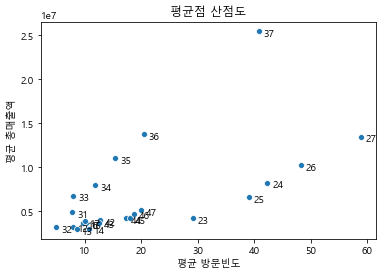

In [22]:
x = np.hstack(평균방문빈도.values[0:4])
y = np.hstack(평균총매출액.values[0:4])

labels = [str(i) + str(j) for j in range(1, 8) for j in range(1, 5)]
for label, x_count, y_count in zip(labels, x, y):
    plt.annotate(label, xycoords='data', textcoords='offset points', xy=(x_count, y_count), xytext=(5,-5))

plt.title('평균점 산점도') #차트 제목
plt.xlabel('평균 방문빈도') # X축 이름
plt.ylabel('평균 총매출액') # Y축 이름
sns.scatterplot(x=x, y=y)
plt.show()

- 총매출액에는 거주지역뿐만 아니라, 고객들의 방문빈도 역시 유의미한 변수일 수 있다. 공분산분석을 통해 방문빈도를 통제한 상태에서 거주지역별 총 매출액의 차이를 검정한다
    - H0: 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 없다.
    - H1: 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 있다.

In [23]:
### ANCOVA
shopping_test = shopping[['총_매출액', '방문빈도', '거주지역']]

print('공분산분석 결과\n', pg.ancova(dv='총_매출액', between='거주지역', covar='방문빈도', data=shopping_test))
print('\n일원분산분석 결과\n', pg.anova(dv='총_매출액', between='거주지역', data=shopping_test))

공분산분석 결과
      Source            SS   DF           F         p-unc       np2
0      거주지역  6.966968e+14    6    4.045779  5.155222e-04  0.023886
1      방문빈도  1.370144e+16    1  477.392823  1.037974e-86  0.324891
2  Residual  2.847096e+16  992         NaN           NaN       NaN

일원분산분석 결과
   Source  ddof1  ddof2          F         p-unc       np2
0   거주지역      6    993  24.759482  1.869176e-27  0.130135


- 양식, 한식, 중식에 대해 5명의 선호도를 나타내는 표이다. 선호하지 않는다를 1, 보통이다를 2, 선호한다를 3으로 응답하였다. 음식 종류에 따라 선호도 차이가 있는지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [ ]:
W = [1,3,1,3,1] #양식
K = [1,3,3,1,1] #한식
C = [2,3,3,3,1] #중식

In [ ]:
### Normality test
print(stats.shapiro(W))
print(stats.shapiro(K))
print(stats.shapiro(C))
print('Shapiro-Wilk 정규성 검정 결과, 세 집단이 정규분포를 따른다는 귀무가설을 기각할 통계적 근거가 있으며, 따라서 각 집단은 정규분포를 따르지 않는다.')

In [ ]:
data = pd.DataFrame(np.array([W, K, C]), index=['W', 'K', 'C'])
data

In [ ]:
from scipy.stats import friedmanchisquare

In [ ]:
friedmanchisquare(data.values[0], data.values[1], data.values[2])

In [ ]:
print('H0: 음식 종류에 따른 5명의 선호도에는 차이가 없다.')
print('H1: 음식 종류에 따른 5명의 선호도는 차이가 있다.')
print('Friedman test를 수행한 결과, 검정통계량 2.67, p-value 0.26으로 유의수준 0.05 하에서 귀무가설을 기각할 수 없다. 음식 종류에 따른 5명의 선호도에는 차이가 없다고 볼 수 있다.')

- A, B, C 지역 학생들의 키가 차이가 있는지 검정하기 위한 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [ ]:
A = [177, 167, 188, 189, 152, 159, 184, 175]
B = [151, 177, 150, 187, 167, 166, 179, 161, 174]
C = [173, 151, 156, 182, 188, 175, 150, 165, 176, 183]

In [ ]:
### Normality test
print(stats.shapiro(A))
print(stats.shapiro(B))
print(stats.shapiro(C))
print('Shapiro-Wilk 정규성 검정 결과, 세 지역 학생들의 키는 정규분포를 따른다는 귀무가설을 기각할 통계적 근거가 있으며, 따라서 각 집단은 정규분포를 따르지 않는다.')

In [ ]:
from scipy.stats import kruskal

In [ ]:
kruskal(A, B, C)

In [ ]:
print('H0: A, B, C 지역 학생들의 키의 평균은 차이가 없다.')
print('H1: A, B, C 지역 중, 최소 한 지역 학생들의 키 평균은 차이가 있다.')
print('Kruskal-Wallis test를 수행한 결과, 검정통계량 1.33, p-value 0.51으로 유의수준 0.05 하에서 귀무가설을 기각할 수 없다. 따라서, 지역에 따른 학생들의 키 평균은 차이가 없다고 볼 수 있다.')

## Contingency Table

- Click dataset
- 웹 페이지 색상에 따라 Click 여부에 차이가 있는지를 알아보려고 한다. 가설을 설정하고, 이를 검정하시오.

In [10]:
### Chi-sq test
click_data = pd.read_csv("./stats_for_python/3-10-1-click_data.csv")
print(click_data)

  color  click  freq
0  blue  click    20
1  blue    not   230
2   red  click    10
3   red    not    40


In [11]:
# 분할표 생성
cross = pd.pivot_table(
    data=click_data,
    values="freq",
    aggfunc="sum",
    index="color",
    columns="click")
cross

click,click,not
color,,
blue,20,230
red,10,40


In [12]:
# 동질성 검정
stats.chi2_contingency(cross, correction=False) # 통계량, p-value, df, expected table

(6.666666666666666, 0.009823274507519252, 1, array([[ 25., 225.],
        [  5.,  45.]]))

In [13]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


- 아래 그래프는 A,B,C 동별 입주민의 주민대표 찬반 투표 결과를 나타낸다. 동별 찬반 비율이 동일한지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)
|구분|A|B|C|
|:-:|:-:|:-:|:-:|
|찬성|50|60|65|
|반대|45|32|55|

In [ ]:
table = pd.DataFrame({'A': [50, 45], 'B': [60, 32], 'C': [65, 55]}, index=['찬성', '반대'])

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
print('H0: 주민대표 찬반 비율 분포는 동과 관련없이 차이가 없다.')
print('H1: 주민대표 찬반 비율 분포는 동별 차이가 있다.')

chi, p, df, expect = chi2_contingency(table) 
print('Statistic:', round(chi, 4), 'P-value', round(p, 4), '로 귀무가설을 기각할 통계적 근거가 부족하다. 따라서 동별 주민대표 찬반 비율 분포에는 차이가 없다고 볼 수 있다.')

- 특정 캠페인에 노출되기 전과 후의 캠페인 주제에 대한 지지 여부를 기록한 데이터이다. 캠페인 전후의 지지 비율이 차이가 있는지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [ ]:
data = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice6_ba.csv', index_col=0)
print(data.head(5).T)

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

In [ ]:
a = 0 
b = 0
c = 0
d = 0
for idx in data.index:
    a += (data.loc[idx].before==0 & data.loc[idx].after==0)
    b += (data.loc[idx].before==0 & data.loc[idx].after==1)
    c += (data.loc[idx].before==1 & data.loc[idx].after==0)
    d += (data.loc[idx].before==1 & data.loc[idx].after==1)

x = [[a, b], [c, d]]
print(mcnemar(x, exact=True, correction=True))
print('H0: 캠페인 노출 전후의 캠페인 주제 지지 여부에는 차이가 없다.')
print('H1: 캠페인 주제 지지 여부에는 캠페인 노출 전후의 차이가 있다.')
print('캠페인 노출 전후에 대한 범주형 변수(지지 여부)의 변화를 보려고 하므로, McNemar 검정을 이용한다. 검정 결과 p-value 0.125로 귀무가설을 기각할 통계적 근거가 충분하지 않다. 따라서, 캠페인 전후의 지지 비율에는 차이가 없다고 볼 수 있다.')

## Linear Regression

- KC House dataset
- 집의 크기(sqft)가 가격에 미치는 영향을 분석하시오

In [17]:
house = pd.read_csv('./ADP_book_ver01/data/kc_house_data.csv')
house = house[["price", "sqft_living"]]

## 독립변수와 종속변수의 선형 가정 
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


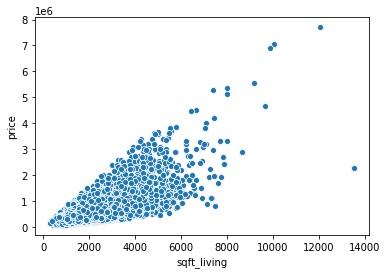

In [18]:
sns.scatterplot(x=house['sqft_living'], y=house['price']) # 회귀분석의 등분산 조건이 깨짐

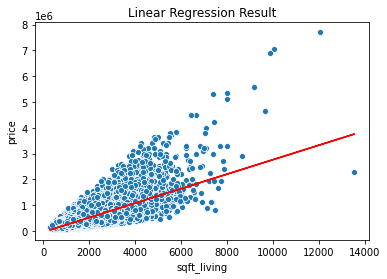

In [19]:
# 변수 할당 
y = house['price']
x = house[['sqft_living']]

# 단순선형회귀모형 적합
lr = smf.ols('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(x)

# 시각화 
sns.scatterplot(x=house['sqft_living'], y=house['price'])
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

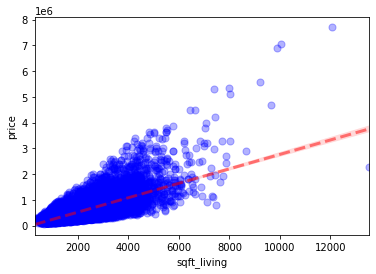

In [20]:
sns.regplot(x=house['sqft_living'], y=house['price'],
            scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3},
            color="r",
            line_kws={"lw":3, "ls":"--","alpha":0.5}) # regplot으로 한줄 실행

[결과해석]
- (1) 데이터가 모형 가정을 만족시키는가? <br>
sqrt_living 변수의 값이 커질수록 잔차의 범위가 넓어지고 있어 등분산성 가정에 위배된다.

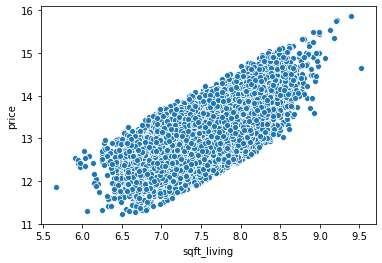

In [21]:
### 데이터를 변형해보자
sns.scatterplot(x=np.log(house['sqft_living']), y=np.log(house['price']))

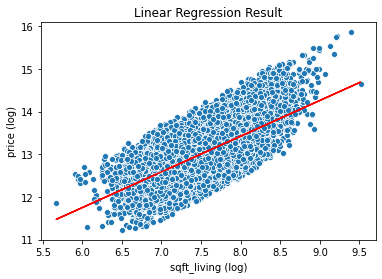

In [22]:
# 변수 할당 
house['log_price'] = np.log(house['price'])
house['log_sqft_living'] = np.log(house[['sqft_living']])

y = house['log_price']
x = house['log_sqft_living']

# 단순선형회귀모형 적합
lr = smf.ols('log_price ~ log_sqft_living', data=house).fit()
y_pred = lr.predict(x)

# 시각화 
sns.scatterplot(x=house['log_sqft_living'], y=house['log_price'])
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('sqft_living (log)', fontsize=10)
plt.ylabel('price (log)',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

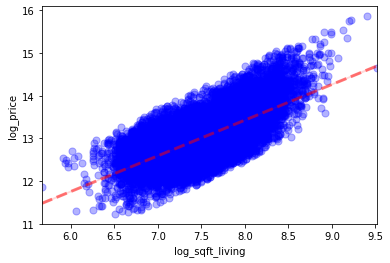

In [23]:
sns.regplot(x=house['log_sqft_living'], y=house['log_price'],
            scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3},
            color="r", line_kws={"lw":3, "ls":"--","alpha":0.5}) # regplot으로 한줄 실행

In [24]:
lr.summary() # 성능 차이는 별로 안나는듯? 다른 변수가 필요해 보임.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:25:25   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7299      0.047    143.001      0.000       6.638       6.822
log_sqft_living     0.8368      0.006    134.459      0.000       0.825       0.849
==============================================================================
Omnibus:                      123.344   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.759
Skew:                           0.142   Prob(JB):                     1.98e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[결과해석] <br>
- (2) 회귀 모형이 통계적으로 유의한가?  <br>
F 검정의 p-value는 0.00으로, 유의수준 (0.05) 하에서 이 통계모델은 유의하다.
- (3) 모형은 데이터를 얼마나 설명할 수 있는가?  <br>
R-square 값은 0.456으로 데이터의 약 50%를 설명하고 있다.
- (4) 모형 내 회귀계수는 유의한가?  <br>
sqrt_living 변수의 T-test 결과는 p-value 0.000으로 유의한 변수이다.
- (5) 모형이 데이터를 잘 적합하고 있는가? <br>
단순 회귀분석으로는 충분히 데이터를 설명할 수 없어 보인다. 변수 추가를 고려해봐야 한다.

- Chick diet dataset
- 시간이 병아리의 몸무게에 주는 영향을 분석하시오.

In [25]:
chick = pd.read_csv('./r_csv/datasets/ChickWeight.csv')
chick = chick.drop('Unnamed: 0', axis=1)
chick.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [26]:
diet_1 = chick[chick.Diet==1]

In [27]:
chick_1 = diet_1[diet_1.Chick==1]
chick_1

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
5,93,10,1,1
6,106,12,1,1
7,125,14,1,1
8,149,16,1,1
9,171,18,1,1


In [28]:
x = chick_1['Time']
y = chick_1['weight']

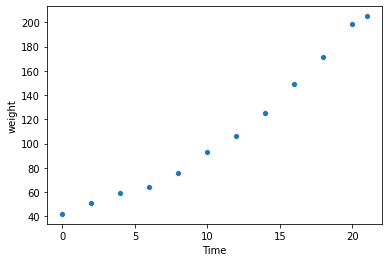

In [29]:
sns.scatterplot(x=x, y=y) # 사실은 시계열분석을 해야되는거 아닌가..

In [30]:
lr = smf.ols('weight ~ Time', data=chick_1).fit()
y_pred = lr.predict(x)

In [31]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     232.7
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           2.97e-08
Time:                        23:25:25   Log-Likelihood:                -46.039
No. Observations:                  12   AIC:                             96.08
Df Residuals:                      10   BIC:                             97.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4654      6.728      3.636      0.005       9.475      39.456
Time           7.9879      0.524     15.255      0.000       6.821       9.155
==============================================================================
Omnibus:                        3.840   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                1.217
Skew:                           0.211   Prob(JB):                        0.544
Kurtosis:                       1.498   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

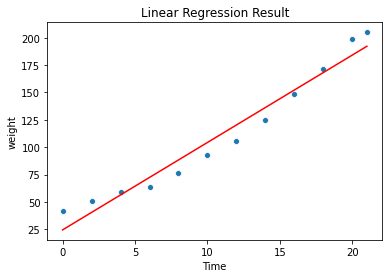

In [32]:
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('Time', fontsize=10)
plt.ylabel('weight',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

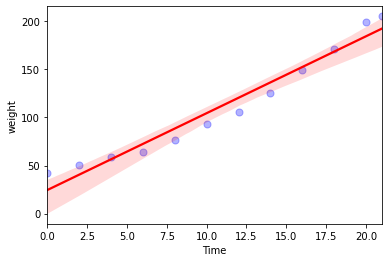

In [33]:
sns.regplot(x=x, y=y, scatter_kws={"fc":"b", "ec":"b", "s":50, "alpha":0.3}, color="r") # regplot으로 한줄 실행

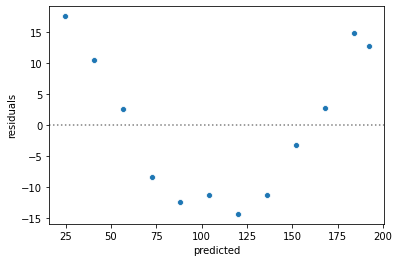

In [34]:
### Manual residual plot
# create a DataFrame of predicted values and residuals
plot_df = pd.DataFrame()
plot_df["predicted"] = y_pred
plot_df["residuals"] = lr.resid

sns.scatterplot(data=plot_df, x="predicted", y="residuals")
plt.axhline(y=0, color='gray', linestyle='dotted')

eval_env: 1


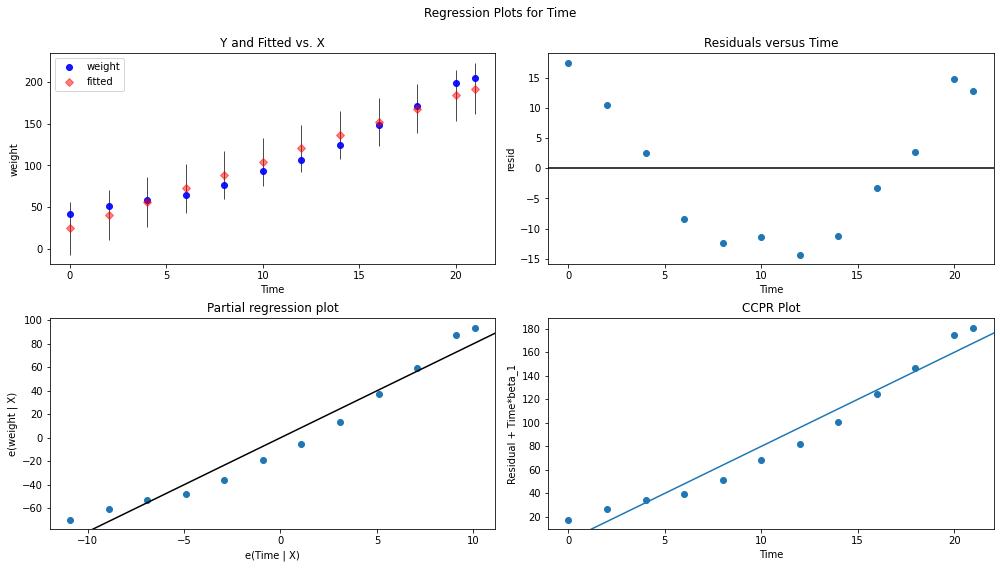

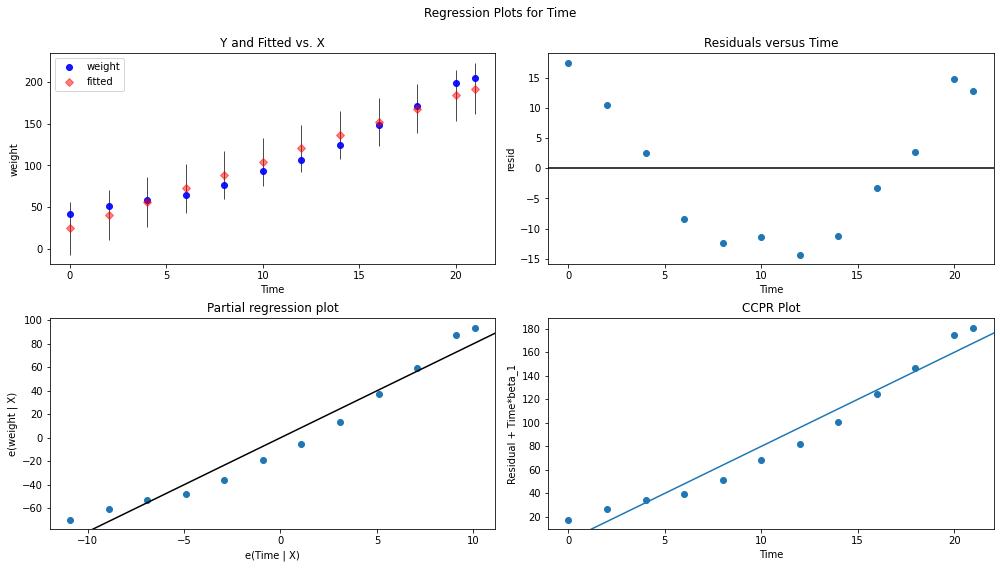

In [35]:
### Residual plot
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(lr, 'Time', fig=fig)

- X1 ~ X4 변수가 Y변수를 예측하려고 한다. 이를 위한 다중 선형 회귀 모델을 구성하고, 유의미한 변수를 선정하시오

In [36]:
### Dummy data
df = pd.DataFrame({'X1': [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
                   'X2': [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
                   'X3': [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
                   'X4': [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12],
                   'Y': [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]})
df

,X1,X2,X3,X4,Y
0,7,26,6,60,78.5
1,1,29,15,52,74.3
2,11,56,8,20,104.3
3,11,31,8,47,87.6
4,7,52,6,33,95.9
5,11,55,9,22,109.2
6,3,71,17,6,102.7
7,1,31,22,44,72.5
8,2,54,18,22,93.1
9,21,47,4,26,115.9


In [37]:
### 변수 간 상관성 확인
df.corr()

,X1,X2,X3,X4,Y
X1,1.000000,0.228579,-0.824134,-0.245445,0.730717
X2,0.228579,1.000000,-0.139242,-0.972955,0.816253
X3,-0.824134,-0.139242,1.000000,0.029537,-0.534671
X4,-0.245445,-0.972955,0.029537,1.000000,-0.821305
Y,0.730717,0.816253,-0.534671,-0.821305,1.000000


In [38]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("Y ~ X1 + X2 + X3 + X4", data=df, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,38.496211,X1
1,254.423166,X2
2,46.868386,X3
3,282.512865,X4


In [40]:
### VIF 10 이상인 변수를 지우는 함수
def apply_vif(data, target_col):
    vif_df = pd.DataFrame()
    x_columns = list(data.columns.difference([target_col]))
    for j in range(len(x_columns)):
        x_str = ''
        for i, column in enumerate(x_columns):
            if i == len(x_columns) -1:
                x_str += column
            else:
                x_str += column + ' + '
    
        y, x = dmatrices(f"{target_col} ~ {x_str}", data=data, return_type="dataframe")
    
        vif_list = []
        for i in range(1, len(x.columns)): 
            vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
        vif_df = pd.DataFrame(vif_list, columns=['vif', 'variable'])
        
        if vif_df['vif'].max() > 10:
            del_column = vif_df['variable'][vif_df['vif']==vif_df['vif'].max()].values[0]
            x_columns.remove(del_column)
        else:
            break
    
    return y, x, vif_df

In [41]:
y, x, vif_df = apply_vif(df, 'Y')
vif_df

,vif,variable
0,3.251068,X1
1,1.063575,X2
2,3.142125,X3


In [42]:
### Model fit
model = smf.ols(formula="Y ~ X1 + X2 + X3", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.37e-08
Time:                        23:25:25   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from itertools import permutations

In [44]:
### 교호작용 항 추가 고려
comb = list(permutations(df.columns.difference(['Y']), 2))
variables= ' + '.join(list(df.columns.difference(['Y']))) + ' + ' + ' + '.join([':'.join(list(y)) for y in comb])
variables

'X1 + X2 + X3 + X4 + X1:X2 + X1:X3 + X1:X4 + X2:X1 + X2:X3 + X2:X4 + X3:X1 + X3:X2 + X3:X4 + X4:X1 + X4:X2 + X4:X3'

In [45]:
model = smf.ols(formula=f"Y ~ {variables}", data=df) ### 대부분 변수가 유의하지 않음. 변수 선택 필요
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     313.6
Date:                Fri, 20 Oct 2023   Prob (F-statistic):            0.00318
Time:                        23:25:25   Log-Likelihood:                -5.3403
No. Observations:                  13   AIC:                             32.68
Df Residuals:                       2   BIC:                             38.90
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.5671    102.668     -0.454      0.695    -488.314     395.180
X1             4.2075      7.304      0.576      0.623     -27.221      35.636
X2             0.9180      1.383      0.664      0.575      -5.032       6.868
X3            -3.0093      4.963     -0.606      0.606     -24.364      18.345
X4             0.9836      1.238      0.794      0.510      -4.345       6.312
X1:X2         -0.0007      0.104     -0.006      0.996      -0.447       0.446
X1:X3          0.1041      0.062      1.669      0.237      -0.164       0.373
X1:X4         -0.0521      0.095     -0.550      0.638      -0.460       0.356
X2:X3          0.0850      0.071      1.205      0.351      -0.218       0.388
X2:X4          0.0151      0.003      5.667      0.030       0.004       0.027
X3:X4          0.0322      0.062      0.523      0.653      -0.233       0.298
==============================================================================
Omnibus:                        0.479   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.552
Skew:                          -0.297   Prob(JB):                        0.759
Kurtosis:                       2.184   Cond. No.                     5.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
### 모델 선택 함수
import time
import itertools
import statsmodels.api as sm

def process_subset(x, y, feature_set):
    model = sm.OLS(y, x[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    criteria = regr.aic # 모델의 AIC 이 부분을 변경하면 기준을 바꿀 수 있음
    # regr.bic
    # regr.rsquared_adj
    
    return {"model": regr, "criteria": criteria}
        
# 전진선택법
def forward(x, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in x.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(process_subset(x=x, y=y, feature_set=predictors + [p] + ['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택. 기준에 따라 변경 필요
    best_model = models.loc[models['criteria'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors) + 1, "predictors in")
    print('Selected predictors:', best_model['model'].model.exog_names,' Criteria: ', best_model[0])
    
    return best_model

# 후진소거법
def backward(x, y, predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(process_subset(x=x, y=y, feature_set=list(combo) + ['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택. 기준에 따라 변경 필요
    best_model = models.loc[models['criteria'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names, 'Criteria: ',best_model[0] )

    return best_model

# 단계적 선택법
def stepwise_model(x, y):
    stepmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    s_model_before = process_subset(x, y, predictors + ['Intercept'])['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) +1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        stepmodels.loc[i] = forward_result
        predictors = stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        backward_result = backward(x=x, y=y, predictors=predictors)

        if backward_result['criteria'] < forward_result['criteria']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]["model"].model.exog_names
            s_model_before = stepmodels.loc[i]["criteria"]
            predictors = [k for k in predictors if k !='Intercept']
            print('backward')
            
        print("Criteria: ", stepmodels.loc[i]['criteria'])
        if stepmodels.loc[i]['criteria'] > s_model_before: # 기준에 따라 멈춤 기준 변경 필요
            break
        else:
            s_model_before = stepmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (stepmodels['model'][len(stepmodels['model'])])

In [47]:
### 전진선택법 구현
def forward_model(x, y):
    formodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    model_result_before = process_subset(x, y, predictors + ['Intercept'])
    s_model_before = model_result_before['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) + 1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        formodels.loc[i] = forward_result
        predictors = formodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        print("Criteria: ", formodels.loc[i]['criteria'])
        if formodels.loc[i]['criteria'] > s_model_before:
            break
        else:
            s_model_before = formodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if len(predictors)==len(x.columns.difference(['Intercept'])):
        return (formodels['model'][len(formodels['model'])])
    elif len(predictors)==1:
        return model_result_before['model']
    else:
        return (formodels['model'][len(formodels['model'])-1])

### 후진선택법 구현
def backward_model(x, y):
    backmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = list(x.columns.difference(['Intercept']))
    model_result_before = process_subset(x, y, predictors)
    s_model_before = model_result_before['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) + 1):
        backward_result = backward(x=x, y=y, predictors=predictors) 
        print('backward')
        backmodels.loc[i] = backward_result
        predictors = backmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        print("Criteria: ", backmodels.loc[i]['criteria'])
        if backmodels.loc[i]['criteria'] > s_model_before:
            break
        else:
            s_model_before = backmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if len(predictors)==0:
        return (backmodels['model'][len(backmodels['model'])])
    elif len(predictors)==len(x.columns.difference(['Intercept']))-1:
        return model_result_before['model']
    else:
        return (backmodels['model'][len(backmodels['model'])-1])


In [48]:
forward_model(x, y).summary()

Criteria, Before selection: 108.33682749906006
Processed  3 models on 1 predictors in
Selected predictors: ['X2', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61c2a650>
forward
Criteria:  96.0703964203777
Processed  2 models on 2 predictors in
Selected predictors: ['X2', 'X1', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61ca7e50>
forward
Criteria:  62.31239276219058
Processed  1 models on 3 predictors in
Selected predictors: ['X2', 'X1', 'X3', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61ca7890>
forward
Criteria:  61.90359687059504
Total elapsed time: 0.010683298110961914 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.37e-08
Time:                        23:25:25   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
stepwise_model(x, y).summary()

Criteria, Before selection: 108.33682749906006
Processed  3 models on 1 predictors in
Selected predictors: ['X2', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bcd190>
forward
Processed  1 models on 0 predictors in 0.0007843971252441406
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bcd090>
Criteria:  96.0703964203777
Processed  2 models on 2 predictors in
Selected predictors: ['X2', 'X1', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bcdb50>
forward
Processed  2 models on 1 predictors in 0.0010821819305419922
Selected predictors: ['X2', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bcd410>
Criteria:  62.31239276219058
Processed  1 models on 3 predictors in
Selected predictors: ['X2', 'X1', 'X3', 'Intercept']  Criteria:  <statsmodels.r

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.3
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.37e-08
Time:                        23:25:25   Log-Likelihood:                -26.952
No. Observations:                  13   AIC:                             61.90
Df Residuals:                       9   BIC:                             64.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X2             0.6569      0.044     14.851      0.000       0.557       0.757
X1             1.6959      0.205      8.290      0.000       1.233       2.159
X3             0.2500      0.185      1.354      0.209      -0.168       0.668
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.261
Skew:                           0.208   Prob(JB):                        0.878
Kurtosis:                       2.445   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Hills dataset
- 산의 등반시간의 영향을 주는 변수를 Forward Selection을 이용하여 선택하시오

In [50]:
### hills data
hills = pd.read_csv('./r_csv/MASS/hills.csv', index_col='Unnamed: 0')
hills.head()

,dist,climb,time
Greenmantle,2.5,650,16.083
Carnethy,6.0,2500,48.350
Craig Dunain,6.0,900,33.650
Ben Rha,7.5,800,45.600
Ben Lomond,8.0,3070,62.267


In [51]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("time ~ dist + climb", data=hills, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,1.740812,dist
1,1.740812,climb


In [52]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 374.2097234346728
Processed  2 models on 1 predictors in
Selected predictors: ['dist', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61be1cd0>
forward
Criteria:  310.81236070267767
Processed  1 models on 2 predictors in
Selected predictors: ['dist', 'climb', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61c433d0>
forward
Criteria:  290.22192241420146
Total elapsed time: 0.007773160934448242 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     181.7
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.40e-18
Time:                        23:25:25   Log-Likelihood:                -142.11
No. Observations:                  35   AIC:                             290.2
Df Residuals:                      32   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dist           6.2180      0.601     10.343      0.000       4.993       7.442
climb          0.0110      0.002      5.387      0.000       0.007       0.015
Intercept     -8.9920      4.303     -2.090      0.045     -17.756      -0.228
==============================================================================
Omnibus:                       47.910   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.976
Skew:                           3.026   Prob(JB):                     1.56e-51
Kurtosis:                      14.127   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Premax dataset
- 신체 정보를 통해 Premax를 예측하려고 한다. 예측에 적절한 변수를 선택하시오.

In [53]:
premax = pd.DataFrame({"나이": [7, 7, 8, 8, 8, 9, 11, 12, 12, 13, 13, 14, 14, 15, 16, 17, 17, 17, 17, 19, 19, 20, 23, 23, 23],
                       "키": [109, 112, 124, 125, 127, 130, 139, 150, 146, 155, 156, 153, 160, 158, 160, 153, 174, 176, 171, 
                             156, 174, 178, 180, 175, 179],
                       "체중": [13.1, 12.9, 14.1, 16.2, 21.5, 17.5, 30.7, 28.4, 25.1, 31.5, 39.9, 42.1, 45.6, 51.2, 35.9, 34.8, 
                              44.7, 60.1, 42.6, 37.2, 54.6, 64, 73.8, 51.1, 71.5],
                       "BMP": [68, 65, 64, 67, 93, 68, 89, 69, 67, 68, 89, 90, 93, 93, 66, 70, 70, 92, 69, 72, 86, 86, 97, 71, 95], 
                       "FEV": [32, 19, 22, 41, 52, 44, 28, 18, 24, 23, 39, 26, 45, 45, 31, 29, 49, 29, 38, 21, 37, 34, 57, 33, 52], 
                       "RV": [258, 449, 441, 234, 202, 308, 305, 369, 312, 413, 206, 253, 174, 158, 302, 204, 187, 188, 172, 216, 
                              184, 225, 171, 224, 225],
                       "FRC": [183, 245, 268, 146, 131, 155, 179, 198, 194, 225, 142, 191, 139, 124, 133, 118, 104, 129, 130, 119, 
                               118, 148, 108, 131, 127], 
                       "TLC": [137, 134, 147, 124, 104, 118, 119, 103, 128, 136, 95, 121, 108, 90, 101, 120, 103, 130, 103, 81, 
                               101, 135, 98, 113, 101],
                       "Premax": [95, 85, 100, 85, 95, 80, 65, 110, 70, 95, 110, 90, 100, 80, 134, 134, 165, 120, 130, 85, 85, 
                                  160, 165, 95, 195]})
premax.head()

,나이,키,체중,BMP,FEV,RV,FRC,TLC,Premax
0,7,109,13.1,68,32,258,183,137,95
1,7,112,12.9,65,19,449,245,134,85
2,8,124,14.1,64,22,441,268,147,100
3,8,125,16.2,67,41,234,146,124,85
4,8,127,21.5,93,52,202,131,104,95


In [54]:
### VIF 계산
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("Premax ~ 나이 + 키 + 체중 + BMP + FEV + RV + FRC + TLC", data=premax, return_type="dataframe")

# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,18.868867,나이
1,13.181053,키
2,42.723481,체중
3,7.114754,BMP
4,2.720191,FEV
5,8.834720,RV
6,12.770155,FRC
7,2.588500,TLC


In [55]:
y, x, vif_df = apply_vif(premax, 'Premax')
vif_df

,vif,variable
0,1.718029,BMP
1,1.997898,FEV
2,2.835665,RV
3,1.626538,TLC
4,7.314046,나이
5,7.590237,키


In [56]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 247.40938943591382
Processed  6 models on 1 predictors in
Selected predictors: ['나이', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bfb490>
forward
Criteria:  237.6052195128863
Processed  5 models on 2 predictors in
Selected predictors: ['나이', 'FEV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bf9fd0>
forward
Criteria:  236.10701068248488
Processed  4 models on 3 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bfb050>
forward
Criteria:  234.55083519747006
Processed  3 models on 4 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'TLC', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61b83cd0>
forward
Criteria:  235.04343582285284
Total elapsed time: 0.016376733779907227 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Fri, 20 Oct 2023   Prob (F-statistic):            0.00104
Time:                        23:25:25   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
나이             4.5416      1.194      3.802      0.001       2.058       7.026
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
### Backward selection
backward_model(x, y).summary()

Criteria, Before selection: 237.6394499557527
Processed  6 models on 5 predictors in 0.003376483917236328
Selected predictors: ['BMP', 'FEV', 'RV', 'TLC', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61be82d0>
backward
Criteria:  236.46947223411823
Processed  5 models on 4 predictors in 0.002063274383544922
Selected predictors: ['FEV', 'RV', 'TLC', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61be1e50>
backward
Criteria:  235.04343582285284
Processed  4 models on 3 predictors in 0.0017163753509521484
Selected predictors: ['FEV', 'RV', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61b918d0>
backward
Criteria:  234.55083519747006
Processed  3 models on 2 predictors in 0.0013303756713867188
Selected predictors: ['FEV', '나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Fri, 20 Oct 2023   Prob (F-statistic):            0.00104
Time:                        23:25:26   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
나이             4.5416      1.194      3.802      0.001       2.058       7.026
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
### Stepwise selection
stepwise_model(x, y).summary()

Criteria, Before selection: 247.40938943591382
Processed  6 models on 1 predictors in
Selected predictors: ['나이', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61be1e10>
forward
Processed  1 models on 0 predictors in 0.0008213520050048828
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bf9350>
Criteria:  237.6052195128863
Processed  5 models on 2 predictors in
Selected predictors: ['나이', 'FEV', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61b47510>
forward
Processed  2 models on 1 predictors in 0.0016443729400634766
Selected predictors: ['나이', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61bbb950>
Criteria:  236.10701068248488
Processed  4 models on 3 predictors in
Selected predictors: ['나이', 'FEV', 'RV', 'Intercept']  Criteria:  <statsmode

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Premax   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.883
Date:                Fri, 20 Oct 2023   Prob (F-statistic):            0.00104
Time:                        23:25:26   Log-Likelihood:                -113.28
No. Observations:                  25   AIC:                             234.6
Df Residuals:                      21   BIC:                             239.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
나이             4.5416      1.194      3.802      0.001       2.058       7.026
FEV            1.5742      0.603      2.610      0.016       0.320       2.829
RV             0.1612      0.090      1.792      0.088      -0.026       0.348
Intercept    -52.4425     48.764     -1.075      0.294    -153.853      48.968
==============================================================================
Omnibus:                        2.467   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.397
Skew:                          -0.268   Prob(JB):                        0.497
Kurtosis:                       1.974   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (5) Salary dataset

In [59]:
salary = pd.DataFrame({"salary": [3030, 6050, 3571, 3300, 0, 9375, 9525, 5000, 999, 3300, 3500, 2493, 1911, 2130, 1185, 5236, 1990, 6000, 6229, 1523],
                       "tenure": [7, 0, 11, 6, 18, 6, 15, 5 ,3, 2, 16, 5, 7, 4, 0, 2, 4, 32, 5, 3],
                       "age": [61, 51, 63, 60, 63, 57, 60, 61, 57, 60, 63, 61, 58, 59, 56, 60, 60, 74, 63, 56],
                       "sales": [161315, 144416, 139208, 100697, 100469, 81667, 76431, 57813, 56154, 53588, 50777, 47678, 47061,
                                 41322, 37154, 35853, 33674, 33296, 32379, 31707],
                       "profits": [2956, 22071, 4430, 6370, 9296, 6328, 5807, 5372, 1120, 6398, 5165, 1704, 2945, 1048, 3780,
                                   1259, 568, 3765, 3782, 578],
                       "assets": [257389, 237545, 49271, 92630, 355935, 86100, 668641, 59920, 36672, 59550, 617679, 42754,
                                  33673, 37675, 30966, 299804, 14166, 19166, 194398, 3665875]})

In [60]:
salary.head()

,salary,tenure,age,sales,profits,assets
0,3030,7,61,161315,2956,257389
1,6050,0,51,144416,22071,237545
2,3571,11,63,139208,4430,49271
3,3300,6,60,100697,6370,92630
4,0,18,63,100469,9296,355935


In [61]:
salary.describe()

,salary,tenure,age,sales,profits,assets
count,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,3817.350000,7.550000,60.150000,68132.950000,4737.100000,3.429905e+05
std,2616.147555,7.653517,4.416178,40564.233925,4717.577399,8.053848e+05
min,0.000000,0.000000,51.000000,31707.000000,568.000000,1.416600e+04
25%,1970.250000,3.000000,57.750000,36828.750000,1592.750000,3.742425e+04
50%,3300.000000,5.000000,60.000000,52182.500000,3781.000000,7.301000e+04
75%,5427.000000,8.000000,61.500000,86367.500000,5937.250000,2.679928e+05
max,9525.000000,32.000000,74.000000,161315.000000,22071.000000,3.665875e+06


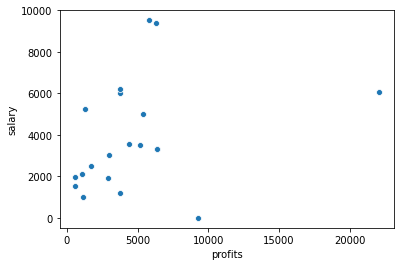

In [62]:
sns.scatterplot(x='profits', y='salary', data=salary)

In [63]:
salary.loc[:, ['profits', 'salary']].corr()

,profits,salary
profits,1.000000,0.301959
salary,0.301959,1.000000


In [64]:
### Simple Model fit
model = smf.ols(formula="salary ~ profits", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.806
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.196
Time:                        23:25:26   Log-Likelihood:                -184.30
No. Observations:                  20   AIC:                             372.6
Df Residuals:                      18   BIC:                             374.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3024.1107    822.629      3.676      0.002    1295.832    4752.390
profits        0.1675      0.125      1.344      0.196      -0.094       0.429
==============================================================================
Omnibus:                        3.644   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                2.071
Skew:                           0.770   Prob(JB):                        0.355
Kurtosis:                       3.334   Cond. No.                     9.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
### Multiple Model fit
model = smf.ols(formula="salary ~ age + sales", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.2316
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.796
Time:                        23:25:26   Log-Likelihood:                -184.99
No. Observations:                  20   AIC:                             376.0
Df Residuals:                      17   BIC:                             379.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1012.7782   8955.327     -0.113      0.911   -1.99e+04    1.79e+04
age           70.4102    144.228      0.488      0.632    -233.885     374.705
sales          0.0087      0.016      0.556      0.585      -0.024       0.042
==============================================================================
Omnibus:                        3.919   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.458
Skew:                           0.853   Prob(JB):                        0.293
Kurtosis:                       3.191   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
### Multiple Model fit
model = smf.ols(formula="salary ~ profits + age + sales + tenure + assets", data=salary)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                 -0.164
Method:                 Least Squares   F-statistic:                    0.4658
Date:                Fri, 20 Oct 2023   Prob (F-statistic):              0.795
Time:                        23:25:26   Log-Likelihood:                -183.72
No. Observations:                  20   AIC:                             379.4
Df Residuals:                      14   BIC:                             385.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    629.5358   2.13e+04      0.030      0.977    -4.5e+04    4.62e+04
profits        0.2069      0.199      1.040      0.316      -0.220       0.633
age           38.8728    361.115      0.108      0.916    -735.641     813.387
sales         -0.0063      0.020     -0.324      0.751      -0.048       0.036
tenure        48.8144    189.934      0.257      0.801    -358.553     456.182
assets        -0.0002      0.001     -0.212      0.835      -0.002       0.002
==============================================================================
Omnibus:                        4.237   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                2.144
Skew:                           0.641   Prob(JB):                        0.342
Kurtosis:                       3.965   Cond. No.                     2.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
y, x = dmatrices("salary ~ profits + age + sales + tenure + assets", data=salary, return_type="dataframe")

In [68]:
### Backward selection
backward_model(x, y).summary()

Criteria, Before selection: 377.43326978089874
Processed  5 models on 4 predictors in 0.002552032470703125
Selected predictors: ['assets', 'profits', 'sales', 'tenure', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61c5e1d0>
backward
Criteria:  377.4485646428145
Total elapsed time: 0.0052242279052734375 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              8.341
Date:                Fri, 20 Oct 2023   Prob (F-statistic):                    0.000609
Time:                        23:25:26   Log-Likelihood:                         -183.72
No. Observations:                  20   AIC:                                      377.4
Df Residuals:                      15   BIC:                                      382.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           49.5384     24.511      2.021      0.061      -2.706     101.783
assets        -0.0002      0.001     -0.232      0.820      -0.002       0.001
profits        0.2101      0.162      1.300      0.213      -0.134       0.554
sales         -0.0063      0.019     -0.334      0.743      -0.046       0.034
tenure        43.8730     87.604      0.501      0.624    -142.850     230.597
==============================================================================
Omnibus:                        4.436   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.291
Skew:                           0.659   Prob(JB):                        0.318
Kurtosis:                       4.006   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
### Forward selection
forward_model(x, y).summary()

Criteria, Before selection: 372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61c994d0>
forward
Criteria:  372.59784786557896
Total elapsed time: 0.005030632019042969 seconds.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 Oct 2023   Prob (F-statistic):                nan
Time:                        23:25:26   Log-Likelihood:                -185.26
No. Observations:                  20   AIC:                             372.5
Df Residuals:                      19   BIC:                             373.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3817.3500    584.988      6.526      0.000    2592.955    5041.745
==============================================================================
Omnibus:                        3.238   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.186
Skew:                           0.809   Prob(JB):                        0.335
Kurtosis:                       2.945   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
### Stepwise selection
stepwise_model(x, y).summary()

Criteria, Before selection: 372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61ca1cd0>
forward
Processed  1 models on 0 predictors in 0.0008289813995361328
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61c8de50>
backward
Criteria:  372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61cab750>
forward
Processed  1 models on 0 predictors in 0.000732421875
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff61ad6ed0>
backward
Criteria:  372.5100000708426
Processed  5 models on 1 predictors in
Selected predictors: ['profits', 'Intercept']  Criteria:  <statsmodels

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 Oct 2023   Prob (F-statistic):                nan
Time:                        23:25:26   Log-Likelihood:                -185.26
No. Observations:                  20   AIC:                             372.5
Df Residuals:                      19   BIC:                             373.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3817.3500    584.988      6.526      0.000    2592.955    5041.745
==============================================================================
Omnibus:                        3.238   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.186
Skew:                           0.809   Prob(JB):                        0.335
Kurtosis:                       2.945   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Bengalulu house dataset
- 데이터는 집의 특징을 나타내는 입력 변수들과 집값의 출력 변수로 구성되어 있다. 집값을 예측하는 회귀 분석을 수행하시오

In [1]:
realestate = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
print(realestate)

     area_type  availability  size  total_sqft  bath  balcony   price
0        Super             0     3      1056.0     2        1   39.07
1         Plot             1     6      2600.0     5        3  120.00
2        Super             1     5      1521.0     3        1   95.00
3        Super             1     3      1170.0     2        1   38.00
4         Plot             1     6      2785.0     5        3  295.00
...        ...           ...   ...         ...   ...      ...     ...
7490     Super             1     5      1345.0     2        1   57.00
7491     Super             1     5      1715.0     3        3  112.00
7492  Built-up             1     8      3453.0     4        0  231.00
7493  Built-up             1     3      1141.0     2        1   60.00
7494     Super             0     7      4689.0     4        1  488.00

[7495 rows x 7 columns]


In [9]:
model = smf.ols('price ~ area_type + availability + size + total_sqft + bath + balcony', data=realestate).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1017.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:30:47   Log-Likelihood:                -42786.
No. Observations:                7495   AIC:                         8.559e+04
Df Residuals:                    7486   BIC:                         8.565e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -59.2399      3.826    -15.483      0.000     -66.740     -51.739
area_type[T.Carpet]    -0.8348     10.371     -0.080      0.936     -21.166      19.496
area_type[T.Plot]      82.9016      5.183     15.994      0.000      72.741      93.062
area_type[T.Super]      0.4783      2.375      0.201      0.840      -4.176       5.133
availability           -2.2666      2.052     -1.104      0.269      -6.290       1.757
size                   -1.2000      1.051     -1.142      0.254      -3.261       0.861
total_sqft              0.0536      0.001     45.532      0.000       0.051       0.056
bath                   32.5548      1.766     18.429      0.000      29.092      36.018
balcony                -0.8327      1.168     -0.713      0.476      -3.122       1.457
==============================================================================
Omnibus:                     9791.187   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25193500.073
Skew:                           6.314   Prob(JB):                         0.00
Kurtosis:                     286.749   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print('price를 종속변수로 하고, 나머지 변수를 독립변수로 하는 선형 회귀분석을 수행하였다.')
print('Adjusted R square는 0.52로, 데이터의 약 52%를 모델이 설명하고 있다.')

In [10]:
### interaction 추가
model = smf.ols('price ~ area_type + availability + size + total_sqft + bath + balcony + area_type * total_sqft', data=realestate).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     898.3
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:48:14   Log-Likelihood:                -42389.
No. Observations:                7495   AIC:                         8.480e+04
Df Residuals:                    7483   BIC:                         8.488e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -24.9804      4.506     -5.543      0.000     -33.814     -16.147
area_type[T.Carpet]              -17.5126     20.032     -0.874      0.382     -56.781      21.756
area_type[T.Plot]               -111.4825      8.414    -13.250      0.000    -127.976     -94.989
area_type[T.Super]               -35.4769      3.837     -9.246      0.000     -42.999     -27.955
availability                      -2.4945      1.948     -1.281      0.200      -6.313       1.324
size                               0.3771      1.005      0.375      0.707      -1.592       2.346
total_sqft                         0.0268      0.002     15.774      0.000       0.023       0.030
area_type[T.Carpet]:total_sqft     0.0075      0.014      0.518      0.604      -0.021       0.036
area_type[T.Plot]:total_sqft       0.0827      0.003     28.882      0.000       0.077       0.088
area_type[T.Super]:total_sqft      0.0240      0.002     11.409      0.000       0.020       0.028
bath                              32.8043      1.699     19.312      0.000      29.474      36.134
balcony                           -1.4086      1.108     -1.271      0.204      -3.581       0.764
==============================================================================
Omnibus:                    11017.431   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22624606.670
Skew:                           8.207   Prob(JB):                         0.00
Kurtosis:                     271.659   Cond. No.                     5.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
### 앞선 모델에서 변수 total_sqft의 이차항을 추가하여 회귀분석 수행
realestate['total_sqft_sq'] = realestate['total_sqft']**2

In [15]:
model = smf.ols('price ~ area_type + availability + size + total_sqft + bath + balcony + area_type * total_sqft + total_sqft_sq', data=realestate).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1261.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:49:31   Log-Likelihood:                -41397.
No. Observations:                7495   AIC:                         8.282e+04
Df Residuals:                    7482   BIC:                         8.291e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -39.9646      3.961    -10.090      0.000     -47.729     -32.200
area_type[T.Carpet]               53.3247     17.615      3.027      0.002      18.795      87.855
area_type[T.Plot]                  4.6099      7.765      0.594      0.553     -10.611      19.831
area_type[T.Super]               -22.1681      3.374     -6.571      0.000     -28.781     -15.555
availability                      -3.8629      1.707     -2.263      0.024      -7.209      -0.517
size                              -9.9392      0.906    -10.965      0.000     -11.716      -8.162
total_sqft                         0.1297      0.003     49.413      0.000       0.125       0.135
area_type[T.Carpet]:total_sqft    -0.0349      0.013     -2.760      0.006      -0.060      -0.010
area_type[T.Plot]:total_sqft       0.0235      0.003      8.378      0.000       0.018       0.029
area_type[T.Super]:total_sqft      0.0154      0.002      8.293      0.000       0.012       0.019
bath                              -0.8218      1.647     -0.499      0.618      -4.051       2.408
balcony                           -3.1707      0.972     -3.263      0.001      -5.076      -1.266
total_sqft_sq                  -3.487e-06   7.33e-08    -47.596      0.000   -3.63e-06   -3.34e-06
==============================================================================
Omnibus:                    12638.885   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27843106.292
Skew:                          11.072   Prob(JB):                         0.00
Kurtosis:                     300.770   Cond. No.                     5.39e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
from patsy import dmatrices

In [21]:
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("price ~ area_type + availability + size + total_sqft + bath + balcony + area_type * total_sqft + total_sqft_sq", data=realestate, return_type="dataframe")

In [23]:
stepwise_model(x, y).summary()

Criteria, Before selection: 91087.96004417891
Processed  12 models on 1 predictors in
Selected predictors: ['total_sqft', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff5e58b350>
forward
Processed  1 models on 0 predictors in 0.001720428466796875
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff5fd63250>
Criteria:  86602.67480949161
Processed  11 models on 2 predictors in
Selected predictors: ['total_sqft', 'total_sqft_sq', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff5e58bb50>
forward
Processed  2 models on 1 predictors in 0.0024089813232421875
Selected predictors: ['total_sqft', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff5efaa650>
Criteria:  83376.99739854608
Processed  10 models on 3 predictors in
Selected predictors: ['total_sqft', 'total

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1889.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:53:11   Log-Likelihood:                -41402.
No. Observations:                7495   AIC:                         8.282e+04
Df Residuals:                    7486   BIC:                         8.288e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
total_sqft                        0.1281      0.002     58.065      0.000       0.124       0.132
total_sqft_sq                 -3.453e-06   6.43e-08    -53.736      0.000   -3.58e-06   -3.33e-06
area_type[T.Plot]:total_sqft      0.0251      0.002     15.437      0.000       0.022       0.028
size                            -10.1406      0.774    -13.104      0.000     -11.658      -8.624
area_type[T.Super]:total_sqft     0.0161      0.002      9.024      0.000       0.013       0.020
area_type[T.Super]              -23.8755      3.148     -7.585      0.000     -30.046     -17.705
balcony                          -3.1530      0.972     -3.245      0.001      -5.058      -1.248
availability                     -4.0739      1.699     -2.398      0.017      -7.405      -0.743
Intercept                       -38.0395      3.679    -10.339      0.000     -45.252     -30.827
==============================================================================
Omnibus:                    12640.083   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27907481.909
Skew:                          11.073   Prob(JB):                         0.00
Kurtosis:                     301.116   Cond. No.                     1.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
### 변수 선택 과정을 거쳐 최종 모델을 완성하고 결과 해석
print('위 선형 회귀에 stepwise selection을 적용하였고, total_sqft와 total_sqft의 제곱. area_type과 total_sqft의 곱, szie, balcony, availability가 유의한 변수로 도출되었다.')
print('결정 계수는 0.669, 수정된 결정계수 0.668로 데이터의 약 67%를 모델이 설명할 수 있다.')
print('잔차의 독립성을 판단하는 Durbin-Watson 통계량이 2에 가까워서 잔차의 독립성은 만족시키는 것으로 보이나, 잔차의 정규성을 확인하는 Jarque-Bera test의 p-value가 0.00으로 잔차가 정규분포를 따른다는 귀무가설을 기각한다.')
print('잔차들의 정규성을 만족시키기 위한 추가 작업이 필요해 보인다.')

위 선형 회귀에 stepwise selection을 적용하였고, total_sqft와 total_sqft의 제곱. area_type과 total_sqft의 곱, szie, balcony, availability가 유의한 변수로 도출되었다.
결정 계수는 0.669, 수정된 결정계수 0.668로 데이터의 약 67%를 모델이 설명할 수 있다.
잔차의 독립성을 판단하는 Durbin-Watson 통계량이 2에 가까워서 잔차의 독립성은 만족시키는 것으로 보이나, 잔차의 정규성을 확인하는 Jarque-Bera test의 p-value가 0.00으로 잔차가 정규분포를 따른다는 귀무가설을 기각한다.
잔차들의 정규성을 만족시키기 위한 추가 작업이 필요해 보인다.


## Non-linear Regression

- 꽃의 길이와 넓이를 보고, 붓꽃 종류를 예측하는 모델을 구성하시오

In [71]:
from sklearn.datasets import load_iris

In [72]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [73]:
# Binary class & 숫자 label로 변경 -> ROC, AUC를 구해보기 위함
iris = iris[iris.Class != 'Setosa']
iris['Class'] = np.where(iris.Class=='Virginica', 1, 0) 

In [74]:
### sepal length 별 Class 확률
iris.groupby('sepal length (cm)')['Class'].mean()

sepal length (cm)
4.9    0.500000
5.0    0.000000
5.1    0.000000
5.2    0.000000
5.4    0.000000
5.5    0.000000
5.6    0.166667
5.7    0.166667
5.8    0.500000
5.9    0.333333
6.0    0.333333
6.1    0.333333
6.2    0.500000
6.3    0.666667
6.4    0.714286
6.5    0.800000
6.6    0.000000
6.7    0.625000
6.8    0.666667
6.9    0.750000
7.0    0.000000
7.1    1.000000
7.2    1.000000
7.3    1.000000
7.4    1.000000
7.6    1.000000
7.7    1.000000
7.9    1.000000
Name: Class, dtype: float64

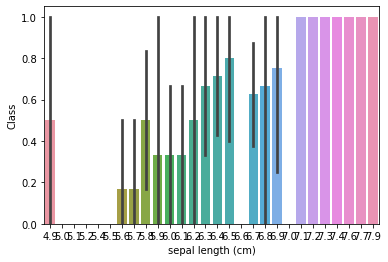

In [75]:
sns.barplot(x="sepal length (cm)", y="Class", data=iris)
plt.show()

In [76]:
iris['sepal_length'] = iris['sepal length (cm)'] # formula 에러 방지

In [77]:
model = smf.glm(formula="Class ~ sepal_length", data=iris, family=sm.families.Binomial())
results = model.fit()

print(results.summary()) # coef에 대해서는 wald test 결과를 보여줌

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.273
Date:                Fri, 20 Oct 2023   Deviance:                       110.55
Time:                        23:25:26   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2448
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.5708      2.907     -4.325   

In [78]:
results.predict(iris['sepal_length'])

50     0.820495
51     0.577361
52     0.788918
53     0.182473
54     0.625566
         ...   
145    0.714191
146    0.527636
147    0.625566
148    0.477357
149    0.333030
Length: 100, dtype: float64

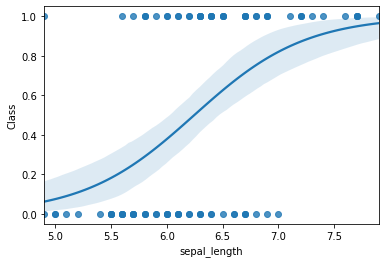

In [79]:
# plot logistic regression curve
sns.regplot(x='sepal_length', y='Class', data=iris, logistic=True, ci=95)
plt.show()

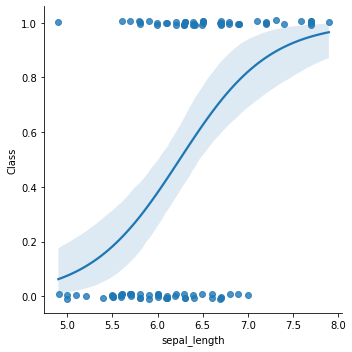

In [80]:
sns.lmplot(x='sepal_length', y='Class', data=iris, logistic=True, ci=95, x_jitter=0.01, y_jitter=0.01) # jitter: data를 흐트리는 옵션
plt.show()

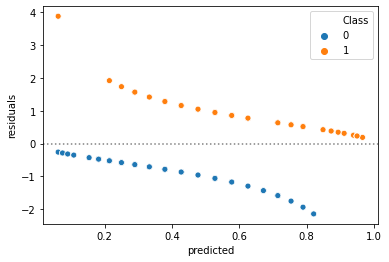

In [81]:
plot_df = pd.DataFrame()
plot_df["predicted"] = results.predict(iris['sepal_length'])
plot_df["residuals"] = results.resid_pearson

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=iris['Class'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [82]:
# pearson chi-sq
print(results.pearson_chi2)
print(np.sum(results.resid_pearson**2))

100.14283284175464
100.14283284175464


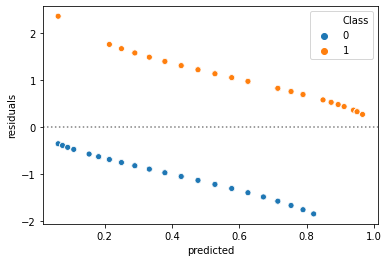

In [83]:
plot_df["residuals"] = results.resid_deviance

sns.scatterplot(data=plot_df, x="predicted", y="residuals", hue=iris['Class'])
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

In [84]:
# summary의 Deviance 값과 일치
# logistic에서는 cross-entropy 개념과 동일
np.sum(results.resid_deviance**2) 

110.54652398942653

## Correlation Analysis

- A 쇼핑은 제품 만족도와 매장 만족도 사이에 연관이 있는지 알아보고 이를 마케팅 기획에 참고하고자 한다. 먼저, A 쇼핑 마케팅 팀은 제품 만족도에 해당하는 가격, 디자인, 품질 만족도와 매장 만족도에 해당하는 직원 서비스, 매장 시설, 고객관리 변수에 대한 만족도를 설문 조사한 후, 이 데이터를 바탕으로 제품 만족도 변수 그룹과 매장 만족도 변수 그룹으로 나눠 정준상관분석을 실시하고자 한다.
    - H0: 제품 만족도는 매장 만족도와 연관성이 없다.
    - H1: 제품 만족도는 매장 만족도와 유의한 상관관계를 가지고 있다.

In [6]:
df = pd.read_csv('./pythondata/data/CCA.csv', encoding='CP949')
df.head()

,품질,가격,디자인,직원 서비스,매장 시설,고객관리
0,8,10,71,72,9,27
1,83,21,94,63,7,77
2,81,62,74,96,7,32
3,75,74,98,96,3,55
4,34,76,98,84,6,95


In [7]:
U = df[['품질', '가격', '디자인']]
V = df[['직원 서비스', '매장 시설', '고객관리']]

In [8]:
from sklearn.cross_decomposition import CCA

In [9]:
### 정준변수 구하기 
cca = CCA(n_components=1).fit(U, V)
U_c, V_c = cca.transform(U, V)
U_c1 = pd.DataFrame(U_c)[0]
V_c1 = pd.DataFrame(V_c)[0]
print(U_c, '\n', V_c)

### 정준상관계수 구하기
CC1 = stats.pearsonr(U_c1, V_c1)
print('제1정준상관계수:', CC1)

### 정준적재량, 교차적재량 구하기
print('제품 만족도 정준변수와 해당 변수들간 정준적재량:', np.corrcoef(U_c1.T, U.T)[0,1:4])
print('제품 만족도 정준변수와 매장 만족도 변수들간 교차적재량:', np.corrcoef(U_c1.T, V.T)[0,1:])
print('매장 만족도 정준변수와 해당 변수들간 정준적재량:', np.corrcoef(V_c1.T, V.T)[0,1:]) 
print('매장 만족도 정준변수와 제품 만족도 변수들간 교차적재량:', np.corrcoef(V_c1.T, U.T)[0,1:4])

[[-0.55451512]
 [-0.12301628]
 [ 0.40708859]
 [ 1.4861872 ]
 [ 1.8393597 ]
 [-0.18638005]
 [-0.47604906]
 [-1.10459412]
 [-0.72231536]
 [ 0.02423555]
 [-0.69744765]
 [ 0.54958654]
 [-0.8098459 ]
 [ 0.36770595]] 
 [[-0.29828858]
 [ 0.51338449]
 [ 0.95000731]
 [ 1.76514223]
 [ 1.81062484]
 [-0.74632557]
 [-1.67676657]
 [-1.00578133]
 [-1.40361614]
 [ 1.38766197]
 [-1.28827534]
 [-0.3120564 ]
 [ 0.23113188]
 [ 0.07315722]]
제1정준상관계수: (0.7717687943183484, 0.0012226670192390231)
제품 만족도 정준변수와 해당 변수들간 정준적재량: [0.35045604 0.77461847 0.55191153]
제품 만족도 정준변수와 매장 만족도 변수들간 교차적재량: [ 0.70598452 -0.0438384   0.5889048 ]
매장 만족도 정준변수와 해당 변수들간 정준적재량: [ 0.91476168 -0.0568025   0.76305858]
매장 만족도 정준변수와 제품 만족도 변수들간 교차적재량: [0.27044132 0.5978383  0.42592516]


## Association Analysis

- 다음의 T와 F가 무작위로 나열되어 있다고 볼 수 있는지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [ ]:
TFlist = ['T','F','F','T','F','T','F','T','T','F','F','T','F','T','F','T','F','T']

In [ ]:
from statsmodels.sandbox.stats.runs import runstest_1samp

In [ ]:
# Run-test를 위한 데이터 변환 
TF_df = pd.DataFrame(TFlist, columns=['product'])

TF_df.loc[TF_df['product']=='T', 'product'] = 1
TF_df.loc[TF_df['product']=='F', 'product'] = 0

# Perform Runs test
runstest_1samp(TF_df['product'], cutoff=0.5, correction=True)

In [ ]:
print('H0: T와 F는 무작위로 나열되어 있다.')
print('H1: T와 F는 무작위로 나열되어 있지 않다. (연관성이 있다)')
print('무작위성을 판단하기 위해 Run test를 진행한다. 검정 결과, p-value 0.029로 유의수준 0.05하에서 귀무가설을 기각할 통계적 근거가 충분하다.')
print('따라서, T와 F의 등장에는 연관성이 있다고 볼 수 있다.')

- Adult dataset
- 다음 장바구니 데이터에서, 지지도가 10% 이상이면서 신뢰도가 60% 이상인 연관규칙을 찾으시오.

In [85]:
adult = pd.read_csv('./data/adult.csv')
adult.head()

,items,transactionID
0,"{age=Middle-aged,workclass=State-gov,education...",1
1,"{age=Senior,workclass=Self-emp-not-inc,educati...",2
2,"{age=Middle-aged,workclass=Private,education=H...",3
3,"{age=Senior,workclass=Private,education=11th,m...",4
4,"{age=Middle-aged,workclass=Private,education=B...",5


In [86]:
adult['items'][0]

'{age=Middle-aged,workclass=State-gov,education=Bachelors,marital-status=Never-married,occupation=Adm-clerical,relationship=Not-in-family,race=White,sex=Male,capital-gain=Low,capital-loss=None,hours-per-week=Full-time,native-country=United-States,income=small}'

In [87]:
### Comma로 데이터 분할
adult['items'] = adult['items'].str.replace('{', '')
adult['items'] = adult['items'].str.replace('}', '')
adult_split = adult['items'].str.split(',', expand=True)
adult_split.values

array([['age=Middle-aged', 'workclass=State-gov', 'education=Bachelors',
        ..., 'hours-per-week=Full-time', 'native-country=United-States',
        'income=small'],
       ['age=Senior', 'workclass=Self-emp-not-inc',
        'education=Bachelors', ..., 'hours-per-week=Part-time',
        'native-country=United-States', 'income=small'],
       ['age=Middle-aged', 'workclass=Private', 'education=HS-grad', ...,
        'hours-per-week=Full-time', 'native-country=United-States',
        'income=small'],
       ...,
       ['age=Middle-aged', 'workclass=Private', 'education=Bachelors',
        ..., 'hours-per-week=Over-time', 'native-country=United-States',
        None],
       ['age=Middle-aged', 'workclass=Private', 'education=Bachelors',
        ..., 'hours-per-week=Full-time', 'native-country=United-States',
        None],
       ['age=Middle-aged', 'workclass=Self-emp-inc',
        'education=Bachelors', ..., 'hours-per-week=Over-time',
        'native-country=United-States', No

In [88]:
### None 제거
adult_split_ary = adult_split.values
adult_list = []
for i in range(len(adult_split_ary)) : 
    temp = list(filter(None, adult_split_ary[i]))
    adult_list.append(temp)

In [89]:
from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [90]:
te = TransactionEncoder()
adult_tr = te.fit(adult_list).transform(adult_list)
adult_tr = pd.DataFrame(adult_tr, columns=te.columns_)
adult_tr

,age=Middle-aged,age=Old,age=Senior,age=Young,capital-gain=High,capital-gain=Low,capital-gain=None,capital-loss=High,capital-loss=Low,capital-loss=None,...,sex=Female,sex=Male,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,workclass=State-gov,workclass=Without-pay
0,True,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False
48838,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
48839,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
48840,True,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [91]:
# 지지도가 10% 이상인 빈번 항목 집합 탐색
adult_ap = apriori(adult_tr, min_support=0.1, use_colnames=True)
adult_ap

,support,itemsets
0,0.505119,(age=Middle-aged)
1,0.260862,(age=Senior)
2,0.197105,(age=Young)
3,0.917387,(capital-gain=None)
4,0.953278,(capital-loss=None)
...,...,...
2611,0.110172,"(income=small, race=White, marital-status=Marr..."
2612,0.176999,"(race=White, marital-status=Married-civ-spouse..."
2613,0.102821,"(race=White, marital-status=Married-civ-spouse..."
2614,0.108595,"(race=White, marital-status=Married-civ-spouse..."


In [92]:
# 신뢰도가 0.6 이상인 빈번 항목 집합 탐색
ar = association_rules(adult_ap, metric="confidence", min_threshold=0.6)
ar.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(age=Middle-aged),(capital-gain=None),0.505119,0.917387,0.463208,0.917028,0.999609,-0.000181,0.995678
1,(age=Middle-aged),(capital-loss=None),0.505119,0.953278,0.480079,0.950428,0.997010,-0.001440,0.942502
2,(hours-per-week=Over-time),(age=Middle-aged),0.259531,0.505119,0.156873,0.604449,1.196649,0.025779,1.251120
3,(age=Middle-aged),(native-country=United-States),0.505119,0.897424,0.448876,0.888655,0.990228,-0.004430,0.921239
4,(age=Middle-aged),(race=White),0.505119,0.855043,0.425351,0.842082,0.984842,-0.006547,0.917926


In [93]:
# 특정 consequents 찾기
ar[(ar.consequents == frozenset({'income=small'})) | (ar.consequents == frozenset({'income=large'}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(age=Young),(income=small),0.197105,0.506122,0.128926,0.654098,1.292372,0.029167,1.427797
116,(marital-status=Never-married),(income=small),0.329982,0.506122,0.208673,0.632376,1.249454,0.041662,1.343432
119,(relationship=Own-child),(income=small),0.155215,0.506122,0.102391,0.659676,1.303393,0.023834,1.451198
352,"(capital-gain=None, age=Young)",(income=small),0.191393,0.506122,0.125691,0.656718,1.297549,0.028823,1.438695
372,"(age=Young, capital-loss=None)",(income=small),0.192560,0.506122,0.126182,0.655290,1.294727,0.028724,1.432734
...,...,...,...,...,...,...,...,...,...
14498,"(race=White, capital-loss=None, workclass=Priv...",(income=small),0.176139,0.506122,0.108513,0.616064,1.217225,0.019365,1.286356
15757,"(race=White, marital-status=Never-married, wor...",(income=small),0.181504,0.506122,0.117501,0.647377,1.279094,0.025638,1.400586
15787,"(race=White, workclass=Private, capital-gain=N...",(income=small),0.168011,0.506122,0.102473,0.609920,1.205085,0.017439,1.266093
16660,"(race=White, marital-status=Never-married, cap...",(income=small),0.184186,0.506122,0.117931,0.640285,1.265080,0.024711,1.372969


In [94]:
# frozenset data extract
[i for i in ar.consequents[0]]

['capital-gain=None']

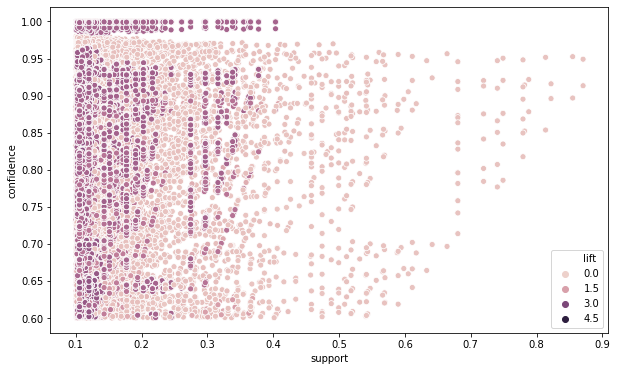

In [95]:
# 성능변수 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ar['support'], y=ar['confidence'], hue=ar['lift'])
plt.show()

In [96]:
import networkx as nx

### Visualize network
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
   
    color_map = []
    colors = np.random.rand(rules_to_show)    
    strs = ["R"+str(i+1) for i in range(rules_to_show + 2)]
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
     
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight=2)
       
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    print(len(colors))
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

20


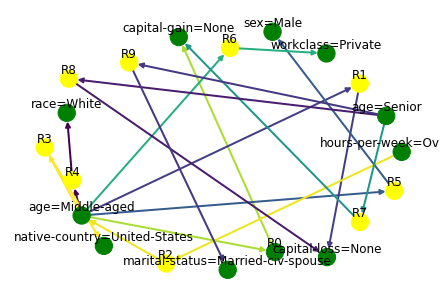

In [97]:
draw_graph(ar, 10)

## Time Series Analysis

### (1) Nile River dataset
- ARIMA

In [98]:
nile = pd.read_csv('./r_csv/datasets/Nile.csv').drop('Unnamed: 0', axis=1)
nile.head()

,time,value
0,1871,1120
1,1872,1160
2,1873,963
3,1874,1210
4,1875,1160


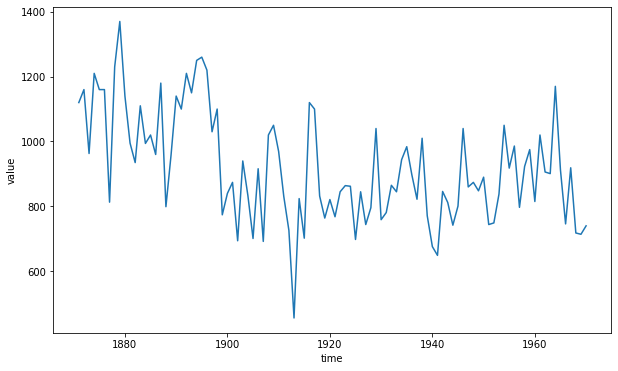

In [99]:
plt.figure(figsize=(10,6))
sns.lineplot(x='time', y='value', data=nile)
plt.show()

In [100]:
nile.set_index('time', inplace=True)

In [101]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [102]:
### 정상성 검정 -> 만족
adf = adfuller(nile, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -4.790765517983117
p-value : 0.0004861430290081467


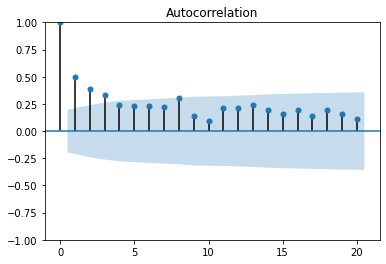

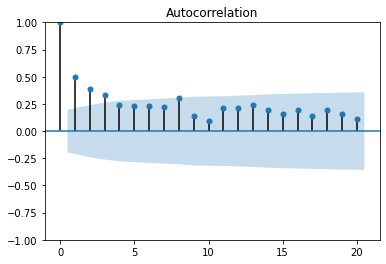

In [103]:
plot_acf(nile) # MA(q)의 값 확인 가능?

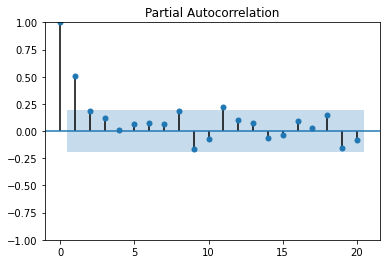

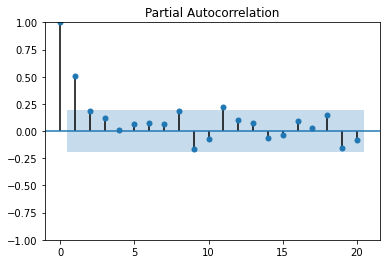

In [104]:
plot_pacf(nile) # AR(p)의 값 확인 가능?

In [105]:
from statsmodels.tsa.arima.model import ARIMA

In [106]:
model = ARIMA(nile, order=(2, 0, 1))
res = model.fit()
res.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -636.269
Date:                Fri, 20 Oct 2023   AIC                           1282.538
Time:                        23:25:33   BIC                           1295.564
Sample:                             0   HQIC                          1287.810
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        934.4056     77.594     12.042      0.000     782.325    1086.486
ar.L1          1.2100      0.151      7.999      0.000       0.914       1.507
ar.L2         -0.2359      0.133     -1.773      0.076      -0.497       0.025
ma.L1         -0.8431      0.102     -8.287      0.000      -1.043      -0.644
sigma2      1.954e+04   3019.354      6.473      0.000    1.36e+04    2.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.84   Prob(JB):                         0.89
Heteroskedasticity (H):               0.61   Skew:                            -0.02
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
forecast_data = res.forecast(steps=10, alpha=0.05) 

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [108]:
pred_y = forecast_data
pred_y.index = range(1971, 1981) # index 조정

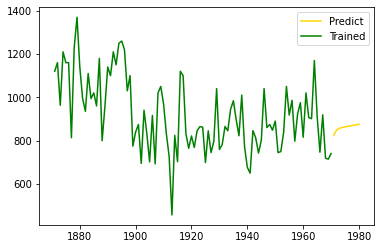

In [109]:
plt.plot(pred_y, color="gold", label='Predict') # 모델이 예상한 가격 그래프
plt.plot(nile['value'], color="green" , label='Trained') # 실제 가격 그래프
plt.legend()
plt.show()

### (2) Air passengers dataset
- ARIMA, SARIMA

In [110]:
### air passengers data
data = pd.read_csv('./data/AirPassengers.csv')
data = data.rename(columns = {'Month':'month', '#Passengers':'passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month') ### 시간 컬럼을 인덱스로 만들어줌
data.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


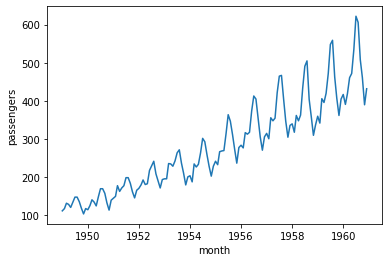

In [111]:
sns.lineplot(x=data.index, y='passengers', data=data)
plt.show()

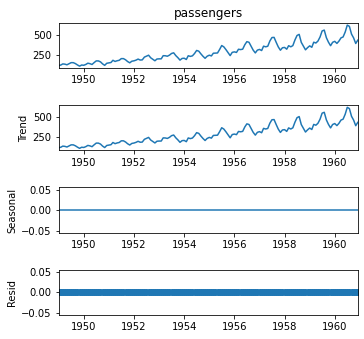

In [112]:
decomposition = sm.tsa.seasonal_decompose(data['passengers'], model = 'additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(5, 5)
plt.show()

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

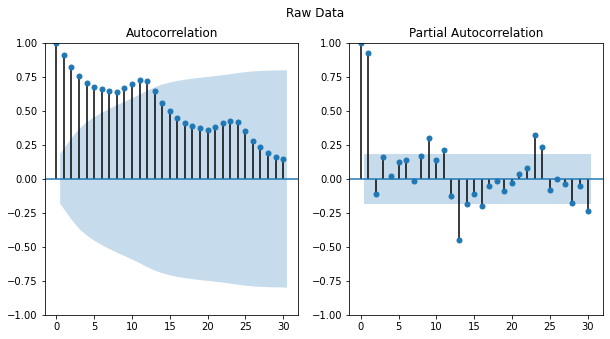

In [115]:
# ACF, PACF plot
fig, ax = plt.subplots(1,2, figsize = (10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags = 30, ax = ax[1])
plt.show()
### ACF 그래프가 점진적으로 감소하는 것은 전형적인 Non-stationary 데이터이다 = 정상성이 없음

In [116]:
# Differencing
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['passengers'].diff()
diff_train_data = diff_train_data.dropna()

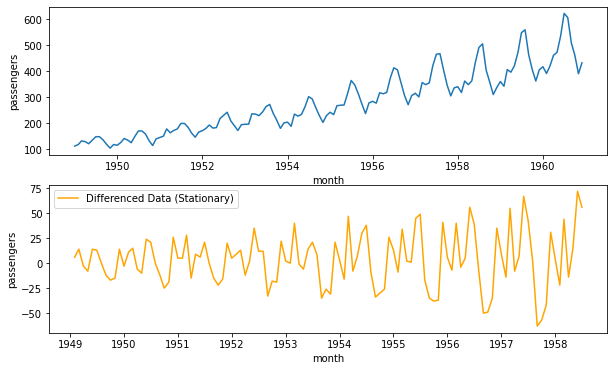

In [117]:
# differenced data plot
plt.figure(figsize = (10, 6))
plt.subplot(211)
sns.lineplot(x=data.index, y='passengers', data=data)
plt.subplot(212)
sns.lineplot(x=diff_train_data.index, y=diff_train_data, color='orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()

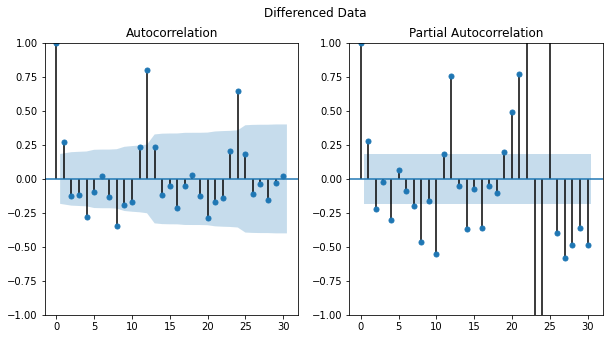

In [118]:
# ACF, PACF plot
# ACF는 sin 곡선의 형태로 점차 감소한다고 보이고, PACF는 애매하지만 Lag 1 이후 절단면을 가지는 것으로 판단하여 AR(1) 모델을 선택함
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Differenced Data')
plot_acf(diff_train_data.values.squeeze(), lags = 30, ax = ax[0])
plot_pacf(diff_train_data.values.squeeze(), lags = 30, ax = ax[1])
plt.show()

In [119]:
# ARIMA model fitting
# The (p, d, q) order of the model for the number of AR parameters, differences, and MA parameters to use.
model = ARIMA(train_data.values, order=(1, 1, 0))
model_fit = model.fit()
model_fit.summary()

# AIC 값은 1068.54

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -532.268
Date:                Fri, 20 Oct 2023   AIC                           1068.536
Time:                        23:25:33   BIC                           1074.008
Sample:                             0   HQIC                          1070.757
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2904      0.089      3.278      0.001       0.117       0.464
sigma2       664.7320     89.253      7.448      0.000     489.800     839.664
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.57   Prob(JB):                         0.20
Heteroskedasticity (H):               6.18   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
# Parameter search
print('Examples of parameter combinations for ARIMA...')
p = range(0, 3)
d = range(1, 2)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))
pdq

Examples of parameter combinations for ARIMA...


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [121]:
aic = list()
for i in pdq:
    model = ARIMA(train_data.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic, 2)}')
    aic.append(round(model_fit.aic,2))

# Search optimal parameters
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

ARIMA: (0, 1, 0) >> AIC : 1076.27
ARIMA: (0, 1, 1) >> AIC : 1063.65
ARIMA: (0, 1, 2) >> AIC : 1060.69
ARIMA: (1, 1, 0) >> AIC : 1068.54
ARIMA: (1, 1, 1) >> AIC : 1058.25
ARIMA: (1, 1, 2) >> AIC : 1057.33
ARIMA: (2, 1, 0) >> AIC : 1065.64
ARIMA: (2, 1, 1) >> AIC : 1058.65
ARIMA: (2, 1, 2) >> AIC : 1057.52


[((1, 1, 2), 1057.33)]

In [122]:
# 위 최적 값으로 만든 모델 다시 Summary
model_opt = ARIMA(train_data.values, order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

# AIC score가 1057.33으로 임의의 모델보다 성능이 좋아졌고, p-value도 모두 유의미하게 나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -524.664
Date:                Fri, 20 Oct 2023   AIC                           1057.328
Time:                        23:25:33   BIC                           1068.272
Sample:                             0   HQIC                          1061.769
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5387      0.128      4.219      0.000       0.288       0.789
ma.L1         -0.2053      0.122     -1.688      0.091      -0.444       0.033
ma.L2         -0.5606      0.084     -6.647      0.000      -0.726      -0.395
sigma2       578.5728    105.827      5.467      0.000     371.155     785.991
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.47   Prob(JB):                         0.09
Heteroskedasticity (H):               5.54   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
### Model for predict
prediction = model_opt_fit.forecast(steps=len(test_data), alpha=0.05)
predicted_value = prediction[0]

In [124]:
from sklearn.metrics import r2_score

In [125]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predict_index = list(test_data.index)

r2 = r2_score(test_data, prediction)

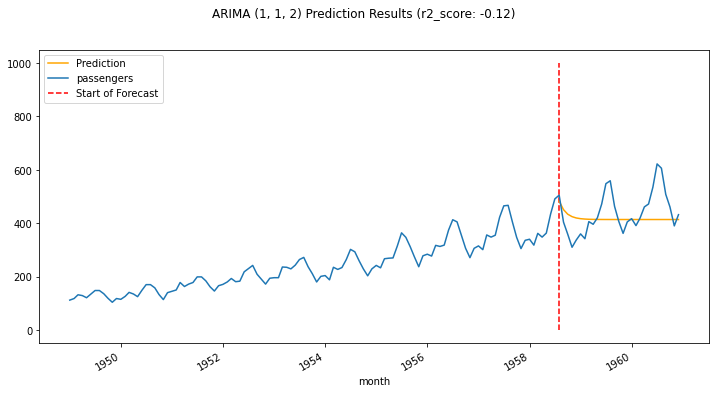

In [126]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(predict_index, prediction, color = 'orange', label = 'Prediction') # 예측값(위 vline 이후 구간에 표시됨)

data.plot(ax = ax);
ax.vlines('1958-08-01', 0, 1000, linestyle = '--', color = 'r', label = 'Start of Forecast') # x좌표를 날짜로 적음
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score: {round(r2,2)})')

plt.show()

# 빨간 점선 이후의 주황색 선이 예측값
# 대체로 추세를 따라가나 피크 값을 완벽히 예측하기에는 다소 무리가 있는 것을 볼 수 있다.
# R2 score도 마이너스인 것을 확인할 수 있었다.

In [127]:
from pmdarima import auto_arima

In [128]:
auto_arima_model = auto_arima(train_data, start_p=1, start_q=1, # p, q 시작값
                             max_p=3, max_q=3, # p, q 최대값
                             m=12, seasonal=True, # 계절성 있는지와 구간(True = SARIMA) / 계절성 없다고 생각되면 m빼고, False
                             d=1, D=1, # 차분 최소, 최대
                             max_P=3, max_Q=3, # P, Q 최대  ## start_P, start_Q의 default 값은 1이라 생략했음
                             trace=True,  # 각 결과값은 print 해줌
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=756.988, Time=0.03 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=758.826, Time=0.16 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=758.186, Time=0.24 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=756.959, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=758.922, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=754.685, Time=0.75 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=758.869, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=760.726, Time=0.27 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=756.686, Time=0.98 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=759.643, Time=0.20 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=756.688, Time=1.30 sec
 ARIMA(0,1,1)(0,1,0)[1

In [129]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -370.278
Date:                                    Fri, 20 Oct 2023   AIC                            752.557
Time:                                            23:26:05   BIC                            768.307
Sample:                                        01-01-1949   HQIC                           758.934
                                             - 07-01-1958                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2218      0.093     -2.388      0.017      -0.404      -0.040
ar.S.L12       0.9288      0.275      3.374      0.001       0.389       1.468
ma.S.L12      -1.2065      0.448     -2.692      0.007      -2.085      -0.328
ma.S.L24       0.2771      0.174      1.596      0.111      -0.063       0.618
ma.S.L36       0.1251      0.164      0.765      0.444      -0.195       0.446
sigma2        75.0386     19.073      3.934      0.000      37.656     112.421
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.91   Prob(JB):                         0.29
Heteroskedasticity (H):               1.05   Skew:                             0.37
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

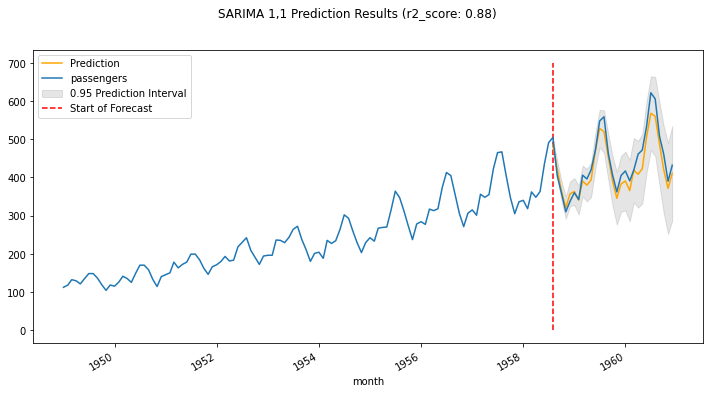

In [131]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(predict_index, predicted_value, color = 'orange', label = 'Prediction') # 예측값(위 vline 이후 구간에 표시됨)
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')

data.plot(ax = ax);
ax.vlines('1958-08-01', 0, 700, linestyle = '--', color = 'r', label = 'Start of Forecast') # x좌표를 날짜로 적음
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {optimal[0][0][0]},{optimal[0][0][1]} Prediction Results (r2_score: {round(r2,2)})')

plt.show()

# 예측 값의 추세가 실제 값을 상당히 잘 따라가고 있으며,
# r2 score가 0.89로 훨씬 더 성능이 향상됨
# 계절성을 반영한 것이 예측 성능을 향상시키는데 기여를 했다고 볼 수 있다.

### (3) Microsoft stock dataset

In [225]:
from pandas import read_csv
ms = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice12_ms_stock.csv', encoding='euc-kr')
ms['Date'] = ms['Date'].astype('datetime64')
ms = ms.set_index('Date')
ms

,Close
Date,
2015-04-01 16:00:00,40.72
2015-04-02 16:00:00,40.29
2015-04-06 16:00:00,41.55
2015-04-07 16:00:00,41.53
2015-04-08 16:00:00,41.42
...,...
2021-03-25 16:00:00,232.34
2021-03-26 16:00:00,236.48
2021-03-29 16:00:00,235.24


In [226]:
resampled = ms.resample('W', label='right').mean() # 3시간 단위로 sum 하되, label은 가장 늦은 시간으로
down_head = resampled.head(300)
down_tail = resampled.tail(14)

In [227]:
down_head

,Close
Date,
2015-04-05,40.5050
2015-04-12,41.5400
2015-04-19,41.8900
2015-04-26,43.9500
2015-05-03,48.7100
...,...
2020-11-29,213.2675
2020-12-06,214.8500
2020-12-13,213.1760


In [228]:
down_tail

,Close
Date,
2021-01-03,223.302500
2021-01-10,217.150000
2021-01-17,214.886000
2021-01-24,222.925000
2021-01-31,233.130000
2021-02-07,241.274000
2021-02-14,243.708000
2021-02-21,243.165000
2021-02-28,232.740000


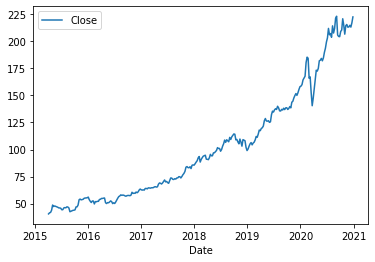

In [187]:
### down_head EDA
sns.lineplot(data=down_head)
plt.show()

In [188]:
from statsmodels.tsa.seasonal import seasonal_decompose

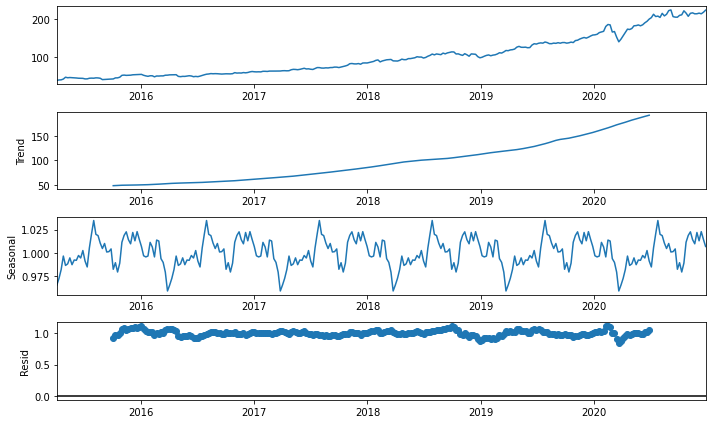

In [189]:
### Seasonal decomposition
ts = down_head
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

In [ ]:
# seasonal decompose를 진행해 본 결과, 주가의 계절성이 일정한 패턴으로 나타나는 것으로 보인다.
# 전체적인 트렌드는 우상향이며, 이는 앞으로도 주식 가격이 올라갈 가능성이 크다는 것을 시사한다.

In [193]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [194]:
### 정상성 검정
adf = adfuller(down_head, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -0.8127595205541026
p-value : 0.9645906862564405


In [ ]:
# adfuller 정상성 검정
# H0: 시계열이 정상성을 갖지 않는다
# H1: 시계열이 정상성을 갖는다
# 검정 결과 p-value 0.97로 귀무가설을 기각할 수 없다. 따라서 본 시계열은 정상 시계열이 아니라고 판단할 수 있다.

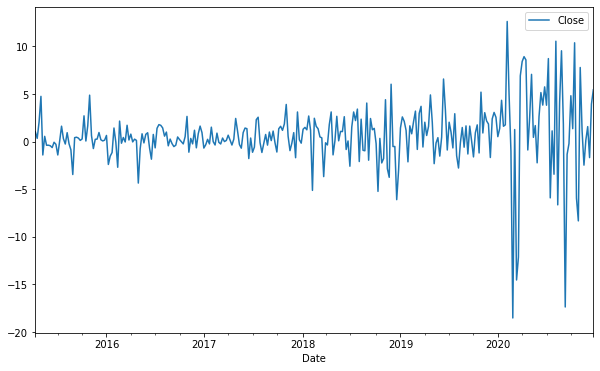

In [195]:
### 차분 실행
diff_data = down_head.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [196]:
adf = adfuller(diff_data, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))
# 차분 수행 후에는 p-value가 작아지며 귀무가설을 기각하며, 1차 차분 후의 시계열은 정상성을 띈다.

ADF Statistic: -10.724158085478308
p-value : 7.60393955903342e-17


/usr/local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


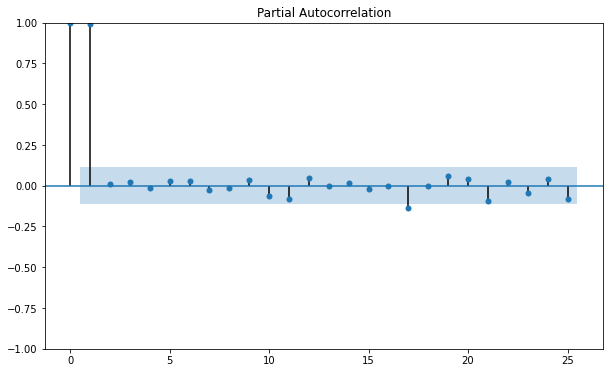

In [199]:
plot_pacf(down_head)
plt.show()

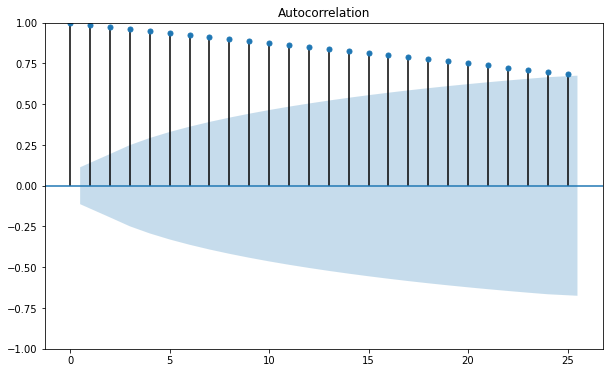

In [200]:
plot_acf(down_head) 
plt.show()
# ACF 그래프를 확인해 본 결과, 데이터 간 자기 상관이 높음을 확인할 수 있다.

In [201]:
from pmdarima import auto_arima

In [202]:
### Model fit
auto_model = auto_arima(down_head, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1555.587, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1557.094, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1556.879, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1563.963, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1557.476, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1557.478, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1555.289, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1557.104, Time=0.06 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1556.505, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1556.843, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1555.063, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1556.869, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] inte

In [203]:
# 적절한 ARIMA parameter 서치를 위해 auto_arima를 사용하였으며, best model로 ARIMA(2, 1, 3) 모델이 선정되었다.
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -769.256
Date:                Wed, 25 Oct 2023   AIC                           1552.511
Time:                        23:47:16   BIC                           1578.414
Sample:                    04-05-2015   HQIC                          1562.879
                         - 12-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3349      0.120      2.789      0.005       0.100       0.570
ar.L1         -0.2725      0.113     -2.403      0.016      -0.495      -0.050
ar.L2          0.7156      0.123      5.796      0.000       0.474       0.958
ma.L1          0.3720      0.114      3.277      0.001       0.149       0.595
ma.L2         -0.7739      0.129     -5.999      0.000      -1.027      -0.521
ma.L3         -0.1871      0.036     -5.139      0.000      -0.258      -0.116
sigma2        10.0319      0.441     22.770      0.000       9.168      10.895
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               782.00
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              12.64   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

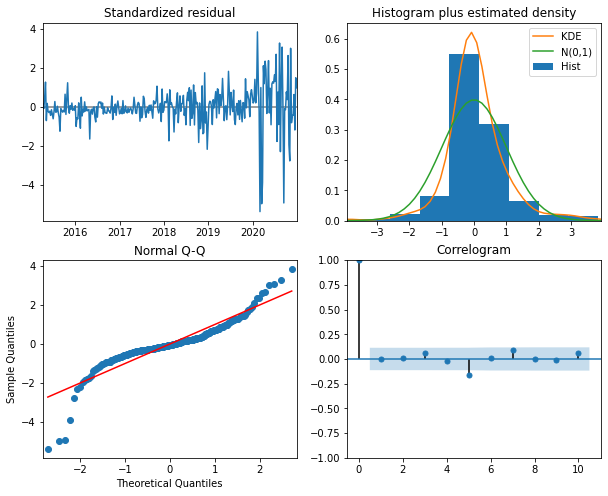

In [207]:
auto_model.plot_diagnostics(figsize=(10, 8));
# 잔차의 정규성과 등분산성 조건이 위배되된다.
# 시계열 값에 로그를 취한 다음 다시 분석을 수행한다.

In [213]:
down_head['Close'] = np.log(down_head['Close'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [214]:
auto_model = auto_arima(down_head, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-1343.799, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1342.577, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-1342.916, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-1331.122, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-1341.799, Time=0.14 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-1341.799, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-1339.800, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-1344.577, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-1342.576, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-1340.577, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-1343.539, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-1343.815, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-1344.914, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-1342.915, Time=0.16 sec
 ARIM

In [215]:
# 적절한 ARIMA parameter 서치를 위해 auto_arima를 사용하였으며, best model로 ARIMA(0, 1, 1) 모델이 선정되었다.
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 675.457
Date:                Thu, 26 Oct 2023   AIC                          -1344.914
Time:                        00:04:53   BIC                          -1333.812
Sample:                    04-05-2015   HQIC                         -1340.470
                         - 12-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0057      0.002      3.406      0.001       0.002       0.009
ma.L1          0.1082      0.047      2.302      0.021       0.016       0.200
sigma2         0.0006   3.46e-05     18.433      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               146.76
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.58
Prob(H) (two-sided):                  0.29   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

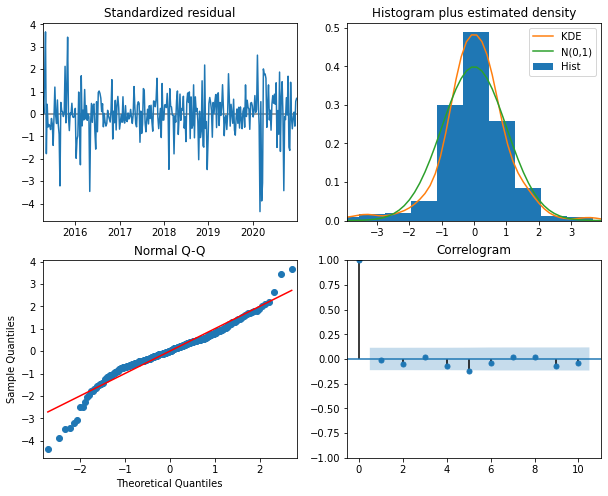

In [216]:
auto_model.plot_diagnostics(figsize=(10, 8));
# 잔차의 정규성 조건이 아직 위배되는 것으로 판단되며, 추가적인 모델 개선이 필요하다.

In [229]:
### predict
down_tail['Close'] = np.log(down_tail['Close'])

auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(down_tail)), index=down_tail.index) 
auto_pred_y.columns = ['predicted_price']
auto_pred_y['predicted_price_exp'] = np.exp(auto_pred_y['predicted_price'])
auto_pred_y
# 모델의 예측 결과는 아래와 같다. 오차의 양보다는 비율이 더 중요할 것으로 판단되므로, 모델을 평가하기 위해 MAPE 지표를 사용한다. 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,predicted_price,predicted_price_exp
Date,,
2021-01-03,5.412871,224.274657
2021-01-10,5.418578,225.558218
2021-01-17,5.424285,226.849125
2021-01-24,5.429992,228.147420
2021-01-31,5.435699,229.453145
2021-02-07,5.441406,230.766343
2021-02-14,5.447113,232.087057
2021-02-21,5.452819,233.415330
2021-02-28,5.458526,234.751204


In [231]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    
MAPE(np.exp(down_tail['Close']), auto_pred_y['predicted_price_exp'])
# 모델에 적합하기 위해 log를 취했으므로, exp 함수를 적용하여 scale을 원상복귀 시켜준다.
# MAPE는 약 2.76%로, 해당 기간 동안 실제값과 예측값이 평균 2.76% 차이남을 의미한다.

2.7626383390505977

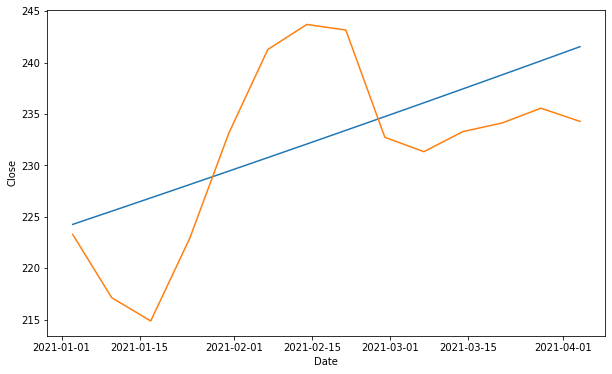

In [235]:
sns.lineplot(x=auto_pred_y.index, y=auto_pred_y['predicted_price_exp'])
sns.lineplot(x=down_tail.index, y=np.exp(down_tail['Close']))
plt.show()